55
Index(['PurchasePrice', 'AreaLiving', 'Rooms', 'AreaProperty',
       'gde_politics_fdp', 'gde_area_settlement_percentage', 'gde_pop_per_km2',
       'gde_foreigners_percentage', 'WorkplaceDensityL', 'RiversAndLakesL',
       'WorkplaceDensityM', 'gde_population', 'gde_private_apartments',
       'WorkplaceDensityS', 'gde_workers_sector3', 'gde_workers_total',
       'NoisePollutionRoadL', 'gde_politics_gps', 'PopulationDensityL',
       'RiversAndLakesM', 'BuiltYear', 'NoisePollutionRoadM',
       'gde_workers_sector2', 'gde_politics_pda', 'gde_politics_rights',
       'PopulationDensityM', 'NoisePollutionRoadS', 'gde_politics_glp',
       'gde_politics_sp', 'Renovationyear', 'RiversAndLakesS',
       'PopulationDensityS', 'NoisePollutionRailwayS', 'ForestDensityS',
       'gde_average_house_hold', 'NoisePollutionRailwayM',
       'gde_social_help_quota', 'NoisePollutionRailwayL', 'ForestDensityM',
       'distanceToTrainStation', 'gde_new_homes_per_1000', 'Longitude',
       'Fore

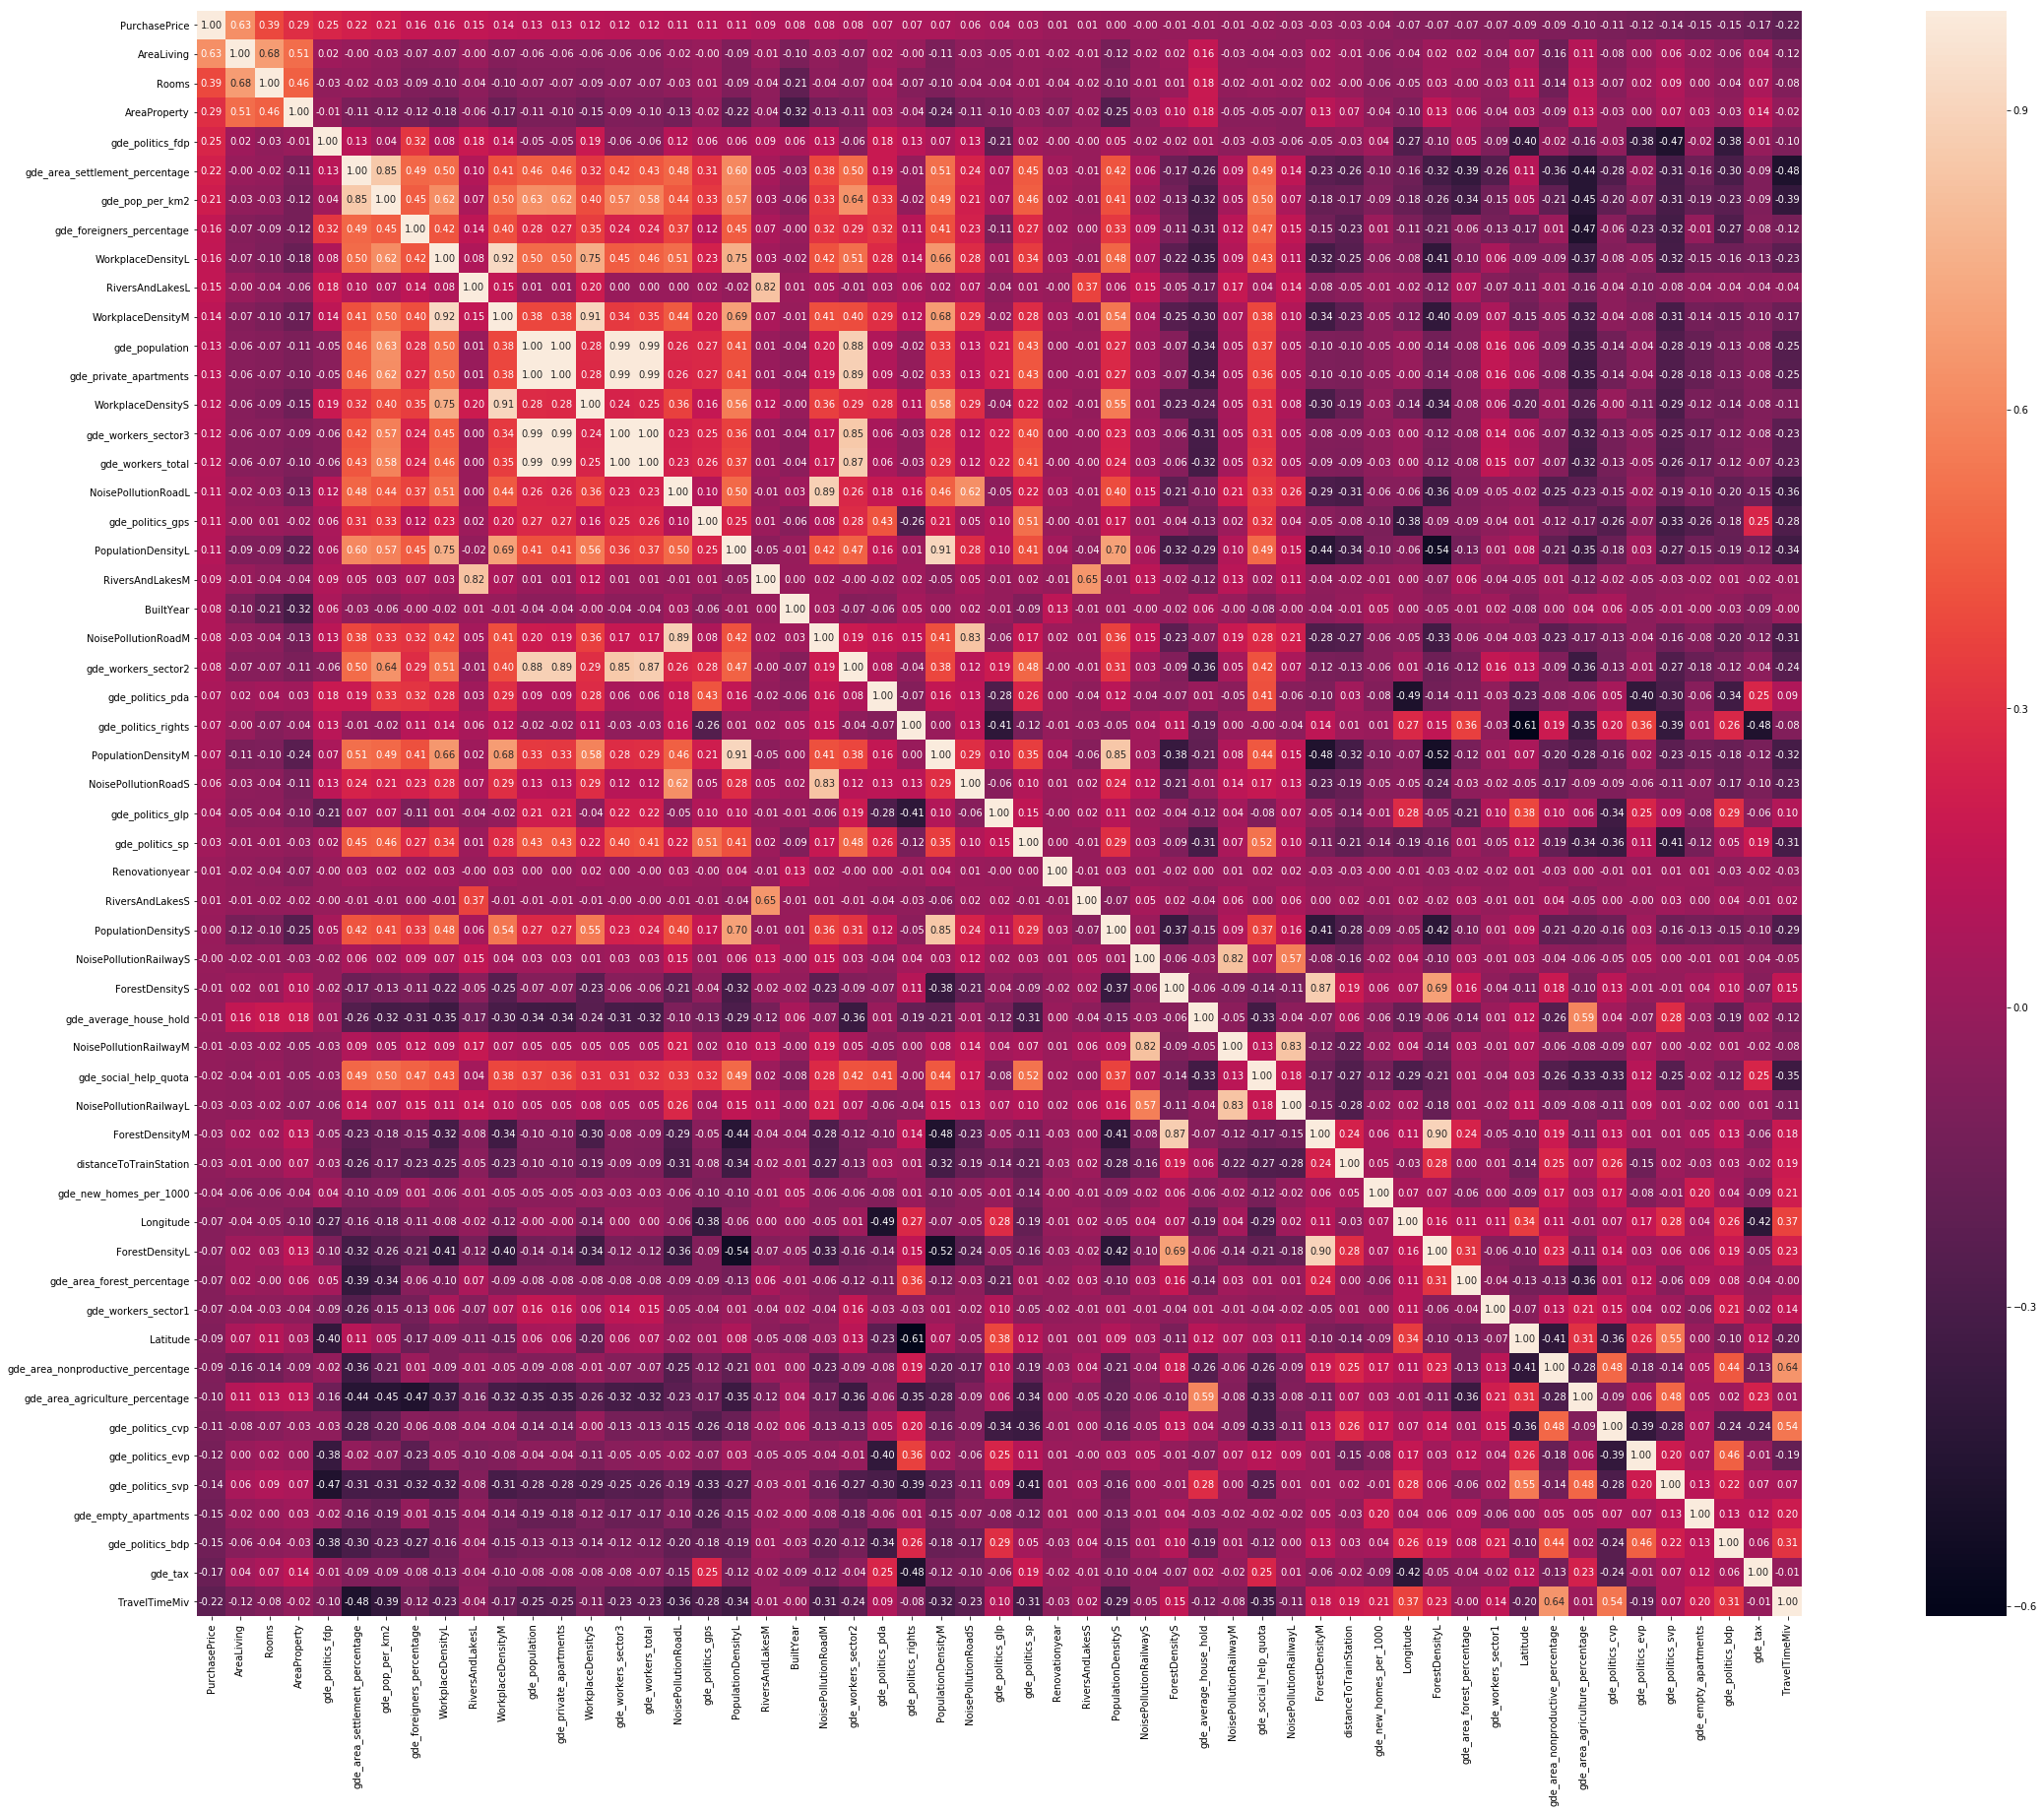

In [27]:
data = pd.read_csv("/Users/lilian/Desktop/project/project data/train.csv",encoding = "ISO-8859-1")
Data = pd.DataFrame(data)
X =Data[['PurchasePrice','AreaLiving','AreaProperty','BuiltYear','ForestDensityL','ForestDensityM','ForestDensityS',
         'Latitude','Longitude','NoisePollutionRailwayL','NoisePollutionRailwayM','NoisePollutionRailwayS',
         'NoisePollutionRoadL','NoisePollutionRoadM','NoisePollutionRoadS','PopulationDensityL','PopulationDensityM',
         'PopulationDensityS','Renovationyear','RiversAndLakesL','RiversAndLakesM','RiversAndLakesS','Rooms',
         'TravelTimeMiv', 'WorkplaceDensityL','WorkplaceDensityM','WorkplaceDensityS',
         'distanceToTrainStation','gde_area_agriculture_percentage','gde_area_forest_percentage','gde_area_nonproductive_percentage',
         'gde_area_settlement_percentage', 'gde_average_house_hold','gde_empty_apartments','gde_foreigners_percentage',
         'gde_new_homes_per_1000', 'gde_politics_bdp','gde_politics_cvp','gde_politics_evp','gde_politics_fdp','gde_politics_glp',
         'gde_politics_gps','gde_politics_pda', 'gde_politics_rights','gde_politics_sp','gde_politics_svp','gde_pop_per_km2',
         'gde_population','gde_private_apartments','gde_social_help_quota','gde_tax','gde_workers_sector1',
         'gde_workers_sector2','gde_workers_sector3','gde_workers_total']]
names =X.columns
length = len(names)
print(length)
corrmat = X.corr()
#k = 11
cols = corrmat.nlargest(55, 'PurchasePrice')['PurchasePrice'].index
print(cols)
cm = X[cols].corr()
f, ax = plt.subplots(figsize=(45, 30))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True,fmt='.2f')
plt.savefig(r"PurchasePricecorr.png")
plt.show()

Index(['PurchasePrice', 'gde_politics_pda', 'BuiltYear', 'gde_politics_rights',
       'Renovationyear', 'FloorNumber', 'gde_politics_evp',
       'gde_politics_bdp'],
      dtype='object')


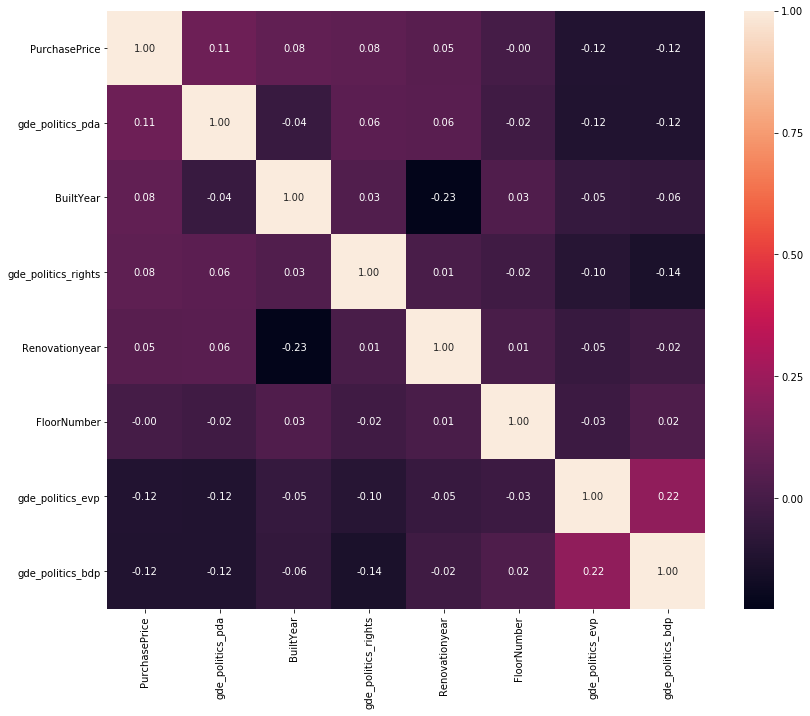

In [25]:
#X1= Data[['PurchasePrice', 'Renovationyear', 'gde_politics_pda', 'FloorNumber',
         #'gde_politics_bdp','gde_politics_rights','gde_politics_evp','StreetAndNr','gde_area_settlement_percentage']]
#X1= Data[['PurchasePrice', 'gde_politics_evp','StreetAndNr']]
#X1['gde_politics_bdp']=X1['gde_politics_bdp'].fillna(0)
#X1['gde_politics_evp']=X1['gde_politics_evp'].fillna(0)  
X1= Data[['PurchasePrice', 'Renovationyear', 'gde_politics_pda', 'FloorNumber',
         'gde_politics_bdp','gde_politics_rights','gde_politics_evp','StreetAndNr','BuiltYear']].fillna(0)
X1['Renovationyear']=X1['Renovationyear'].fillna(0)
X1['FloorNumber']=X1['FloorNumber'].fillna(-1)
corrmat = X1.corr()
#k = 11
cols = corrmat.nlargest(10, 'PurchasePrice')['PurchasePrice'].index
print(cols)
cm = X1[cols].corr()
f, ax = plt.subplots(figsize=(14, 11))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True,fmt='.2f')
plt.savefig(r"PurchasePricecorr1.png")
plt.show()

## Calculate the features importance using RandomForestRegressor

In [22]:
#Model Based Feature Ranking
import sklearn
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.ensemble import RandomForestRegressor
import random 
import pandas as pd

Data = pd.DataFrame(data)
X =Data[['AreaLiving','AreaProperty','BuiltYear','ForestDensityL','ForestDensityM','ForestDensityS',
         'Latitude','Longitude','NoisePollutionRailwayL','NoisePollutionRailwayM','NoisePollutionRailwayS',
         'NoisePollutionRoadL','NoisePollutionRoadM','NoisePollutionRoadS','PopulationDensityL','PopulationDensityM',
         'PopulationDensityS','Renovationyear','RiversAndLakesL','RiversAndLakesM','RiversAndLakesS','Rooms',
         'TravelTimeMiv', 'WorkplaceDensityL','WorkplaceDensityM','WorkplaceDensityS',
         'distanceToTrainStation','gde_area_agriculture_percentage','gde_area_forest_percentage','gde_area_nonproductive_percentage',
         'gde_area_settlement_percentage', 'gde_average_house_hold','gde_empty_apartments','gde_foreigners_percentage',
         'gde_new_homes_per_1000', 'gde_politics_bdp','gde_politics_cvp','gde_politics_evp','gde_politics_fdp','gde_politics_glp',
         'gde_politics_gps','gde_politics_pda', 'gde_politics_rights','gde_politics_sp','gde_politics_svp','gde_pop_per_km2',
         'gde_population','gde_private_apartments','gde_social_help_quota','gde_tax','gde_workers_sector1',
         'gde_workers_sector2','gde_workers_sector3','gde_workers_total','Name','GroupNameDe','StateShort',
         'SourceId','RealEstateTypeId','HouseObject','Zip','FloorNumber','location_is_complete',
        'location_has_street']]

#Pick up all the numerical features

#one_hot_encoded_training_predictors = pd.get_dummies(train_predictors)
#print(pd.get_dummies(X.GroupNameDe, drop_first=True))
Y = Data[['PurchasePrice']]
#Y = np.log1p(Y)
X= X.drop([38037, 38038])
Y =Y.drop([38037, 38038])
#X['AreaLiving'] = np.log1p(X['AreaLiving'])
#print(X['gde_politics_cvp'][X['gde_politics_cvp'].isnull().values==True])




X['gde_politics_rights']=X['gde_politics_rights'].fillna(0)

X['gde_politics_glp']= X['gde_politics_glp'].fillna(0)          


X['gde_politics_gps']=X['gde_politics_gps'].fillna(0)

X['gde_politics_cvp']=X['gde_politics_cvp'].fillna(0)
X['gde_politics_evp']=X['gde_politics_evp'].fillna(0)
X['gde_politics_fdp']=X['gde_politics_fdp'].fillna(0)
X['gde_politics_sp']=X['gde_politics_sp'].fillna(0)
X['gde_politics_svp']=X['gde_politics_svp'].fillna(0)
X['gde_politics_bdp']=X['gde_politics_bdp'].fillna(0)
X['Renovationyear']=X['Renovationyear'].fillna(0)

X['FloorNumber']=X['FloorNumber'].fillna(-1)
X['gde_politics_pda']=X['gde_politics_pda'].fillna(0)

X['gde_politics_rights'] = X['gde_politics_rights'].fillna(0)
aera = [0 if values == 0 else np.log1p(values) for values in X.AreaProperty]
X['AreaProperty'] = aera


one_hot = pd.get_dummies(X.GroupNameDe)
X = X.drop('GroupNameDe',axis=1)
X = X.join(one_hot)

one_hot = pd.get_dummies(X.Name)
X = X.drop('Name',axis = 1)
X = X.join(one_hot)


one_hot = pd.get_dummies(X.StateShort)
X = X.drop('StateShort',axis = 1)
X = X.join(one_hot)


names = X.columns
print(len(names))

#choose a random sample of 20000 of each data column for calculating features ranking 
dataX = np.array(X)
dataY = np.array(Y)
#pairs = list((zip(dataX,dataY)))
#pairs = random.sample(pairs, 20000) 
#A1, B1 = zip(*pairs)

#dataX_small = np.array(A1)
#dataY_small = np.array(B1)
#dataY_small =dataY_small.reshape(20000,)
dataX_small = dataX
dataY_small = dataY
dataY_small =dataY_small.reshape(len(dataY),)
rf = RandomForestRegressor(n_estimators =200, max_depth =10)
scores =[]
for i in range(dataX_small.shape[1]):
    score = cross_val_score(rf, dataX_small[:, i:i+1], dataY_small, scoring ='r2', cv = 5)
    scores.append((round(np.mean(score),3),names[i]))
print(sorted(scores, reverse = True))



109
[(0.368, 'AreaLiving'), (0.167, 'Rooms'), (0.158, 'Zip'), (0.109, 'gde_politics_fdp'), (0.1, 'gde_area_settlement_percentage'), (0.097, 'Longitude'), (0.095, 'gde_pop_per_km2'), (0.093, 'gde_tax'), (0.091, 'gde_politics_gps'), (0.082, 'gde_politics_cvp'), (0.081, 'gde_empty_apartments'), (0.077, 'gde_politics_svp'), (0.071, 'gde_politics_evp'), (0.071, 'gde_area_forest_percentage'), (0.068, 'gde_foreigners_percentage'), (0.067, 'RealEstateTypeId'), (0.063, 'gde_area_agriculture_percentage'), (0.062, 'gde_politics_pda'), (0.061, 'gde_politics_glp'), (0.06, 'gde_workers_total'), (0.057, 'gde_private_apartments'), (0.053, 'AreaProperty'), (0.052, 'gde_workers_sector3'), (0.05, 'gde_politics_bdp'), (0.048, 'gde_population'), (0.043, 'gde_politics_rights'), (0.04, 'gde_new_homes_per_1000'), (0.038, 'gde_social_help_quota'), (0.018, 'Wohnung'), (0.014, 'gde_area_nonproductive_percentage'), (0.012, 'Latitude'), (0.011, 'gde_politics_sp'), (0.008, 'RiversAndLakesL'), (0.007, 'TravelTimeMiv

[(0.391, 'AreaLiving'), (0.253, 'Zip'), (0.205, 'Rooms'), (0.192, 'gde_politics_fdp'), (0.19, 'gde_area_settlement_percentage'), (0.183, 'gde_tax'), (0.182, 'gde_pop_per_km2'), (0.181, 'gde_politics_gps'), (0.168, 'gde_politics_svp'), (0.167, 'gde_politics_cvp'), (0.166, 'gde_foreigners_percentage'), (0.163, 'gde_empty_apartments'), (0.162, 'Longitude'), (0.158, 'gde_workers_sector3'), (0.155, 'gde_workers_total'), (0.155, 'gde_area_forest_percentage'), (0.151, 'gde_private_apartments'), (0.151, 'gde_politics_evp'), (0.148, 'gde_politics_glp'), (0.146, 'gde_population'), (0.145, 'gde_area_agriculture_percentage'), (0.14, 'gde_politics_pda'), (0.136, 'gde_politics_rights'), (0.133, 'gde_politics_bdp'), (0.131, 'gde_new_homes_per_1000'), (0.124, 'gde_social_help_quota'), (0.109, 'RealEstateTypeId'), (0.107, 'gde_area_nonproductive_percentage'), (0.094, 'Latitude'), (0.092, 'AreaProperty'), (0.088, 'gde_politics_sp'), (0.083, 'gde_workers_sector1'), (0.076, 'gde_workers_sector2'), (0.076, 'TravelTimeMiv'), (0.065, 'WorkplaceDensityS'), (0.064, 'WorkplaceDensityM'), (0.064, 'RiversAndLakesL'), (0.062, 'WorkplaceDensityL'), (0.059, 'NoisePollutionRoadM'), (0.056, 'Wohnung'), (0.056, 'PopulationDensityS'), (0.056, 'PopulationDensityL'), (0.054, 'gde_average_house_hold'), (0.053, 'NoisePollutionRoadL'), (0.049, 'ForestDensityL'), (0.048, 'NoisePollutionRoadS'), (0.043, 'PopulationDensityM'), (0.042, 'distanceToTrainStation'), (0.04, 'GE'), (0.039, 'HouseObject'), (0.037, 'Haus'), (0.037, 'FloorNumber'), (0.034, 'NoisePollutionRailwayL'), (0.03, 'NoisePollutionRailwayM'), (0.03, 'BuiltYear'), (0.023, 'RiversAndLakesM'), (0.021, 'SourceId'), (0.019, 'ForestDensityM'), (0.018, 'ZH'), (0.018, 'VD'), (0.018, 'NoisePollutionRailwayS'), (0.014, 'Homegate'), (0.013, 'location_has_street'), (0.013, 'VS'), (0.012, 'location_is_complete'), (0.01, 'ZG'), (0.01, 'BE'), (0.009, 'Attikawohnung'), (0.008, 'RiversAndLakesS'), (0.008, 'ComHistory'), (0.006, 'SG'), (0.006, 'AG'), (0.005, 'SO'), (0.004, 'TI'), (0.003, 'Home.ch'), (0.003, 'ForestDensityS'), (0.002, 'SZ'), (0.001, 'TG'), (0.001, 'NW'), (0.001, 'JU'), (0.001, 'FR'), (-0.0, 'Urbanhome'), (-0.0, 'Terassenhaus'), (0.0, 'SH'), (-0.0, 'OW'), (0.0, 'Newhome'), (0.0, 'Mehrfamilienhaus'), (-0.0, 'Immostreet'), (-0.0, 'Immoscout'), (0.0, 'GR'), (0.0, 'GL'), (-0.0, 'Doppelhaus'), (0.0, 'AR'), (-0.001, 'Zimmer'), (-0.001, 'UR'), (-0.001, 'Reihenhaus'), (-0.001, 'NabHome'), (-0.001, 'NE'), (-0.001, 'Maisonettewohnung'), (-0.001, 'Loftwohnung'), (-0.001, 'LU'), (-0.001, 'Immowelt'), (-0.001, 'Immoclick'), (-0.001, 'ICasa'), (-0.001, 'BS'), (-0.001, 'BL'), (-0.001, 'Anderes Haus'), (-0.001, 'AI'), (-0.003, 'Renovationyear')]





[(0.404, 'AreaLiving'), (0.22, 'Rooms'), (0.136, 'Zip'), (0.133, 'Longitude'), (0.124, 'gde_tax'), (0.103, 'gde_politics_fdp'), (0.099, 'AreaProperty'), (0.098, 'RealEstateTypeId'), (0.087, 'gde_area_settlement_percentage'), (0.086, 'gde_pop_per_km2'), (0.084, 'TravelTimeMiv'), (0.078, 'gde_politics_pda'), (0.068, 'gde_politics_gps'), (0.065, 'gde_politics_svp'), (0.065, 'gde_empty_apartments'), (0.064, 'gde_politics_bdp'), (0.063, 'gde_workers_sector3'), (0.06, 'gde_politics_cvp'), (0.059, 'gde_area_forest_percentage'), (0.059, 'Wohnung'), (0.058, 'gde_private_apartments'), (0.058, 'gde_population'), (0.053, 'gde_workers_total'), (0.053, 'gde_foreigners_percentage'), (0.052, 'gde_area_agriculture_percentage'), (0.051, 'gde_politics_glp'), (0.048, 'Latitude'), (0.045, 'gde_politics_rights'), (0.045, 'gde_average_house_hold'), (0.044, 'RiversAndLakesL'), (0.043, 'gde_politics_evp'), (0.041, 'gde_area_nonproductive_percentage'), (0.041, 'HouseObject'), (0.04, 'gde_social_help_quota'), (0.04, 'Haus'), (0.04, 'GE'), (0.037, 'gde_workers_sector2'), (0.036, 'FloorNumber'), (0.035, 'WorkplaceDensityL'), (0.032, 'gde_new_homes_per_1000'), (0.031, 'WorkplaceDensityM'), (0.03, 'BuiltYear'), (0.028, 'gde_workers_sector1'), (0.028, 'WorkplaceDensityS'), (0.026, 'NoisePollutionRoadL'), (0.025, 'NoisePollutionRoadM'), (0.023, 'gde_politics_sp'), (0.022, 'PopulationDensityL'), (0.02, 'ZH'), (0.019, 'SourceId'), (0.019, 'PopulationDensityM'), (0.018, 'PopulationDensityS'), (0.018, 'NoisePollutionRoadS'), (0.017, 'VD'), (0.016, 'RiversAndLakesM'), (0.013, 'VS'), (0.012, 'location_is_complete'), (0.012, 'location_has_street'), (0.011, 'distanceToTrainStation'), (0.011, 'NoisePollutionRailwayL'), (0.011, 'Homegate'), (0.01, 'ForestDensityL'), (0.01, 'BE'), (0.01, 'Attikawohnung'), (0.009, 'ZG'), (0.009, 'ComHistory'), (0.008, 'NoisePollutionRailwayM'), (0.006, 'SO'), (0.006, 'NoisePollutionRailwayS'), (0.006, 'AG'), (0.005, 'TI'), (0.005, 'SG'), (0.005, 'RiversAndLakesS'), (0.003, 'Renovationyear'), (0.002, 'SZ'), (0.002, 'Home.ch'), (0.001, 'Terassenhaus'), (0.001, 'TG'), (0.001, 'SH'), (0.001, 'JU'), (0.001, 'GR'), (0.001, 'GL'), (0.001, 'ForestDensityM'), (0.001, 'FR'), (-0.0, 'Zimmer'), (-0.0, 'Urbanhome'), (-0.0, 'UR'), (0.0, 'Newhome'), (-0.0, 'NabHome'), (0.0, 'NW'), (-0.0, 'Mehrfamilienhaus'), (-0.0, 'Loftwohnung'), (-0.0, 'LU'), (-0.0, 'Immowelt'), (-0.0, 'Immostreet'), (-0.0, 'Immoscout'), (-0.0, 'ForestDensityS'), (-0.0, 'Doppelhaus'), (0.0, 'BS'), (-0.0, 'BL'), (-0.0, 'AR'), (-0.001, 'Reihenhaus'), (-0.001, 'OW'), (-0.001, 'NE'), (-0.001, 'Maisonettewohnung'), (-0.001, 'Immoclick'), (-0.001, 'ICasa'), (-0.001, 'Anderes Haus'), (-0.001, 'AI')]

# Feature Ranking using XGBoost

/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/index

28
21
4 Index(['gde_workers_sector3', 'gde_workers_total', 'gde_private_apartments',
       'gde_population', 'gde_workers_sector2', 'gde_new_homes_per_1000',
       'RiversAndLakesM', 'gde_pop_per_km2', 'gde_politics_bdp',
       'RiversAndLakesL', 'WorkplaceDensityL',
       'gde_area_nonproductive_percentage', 'WorkplaceDensityM',
       'WorkplaceDensityS', 'gde_empty_apartments', 'gde_workers_sector1',
       'gde_politics_cvp', 'gde_politics_evp', 'gde_social_help_quota',
       'TravelTimeMiv', 'BuiltYear'],
      dtype='object')
Index(['AreaLiving', 'Rooms', 'TravelTimeMiv', 'BuiltYear',
       'NoisePollutionRoadL', 'NoisePollutionRoadM', 'PopulationDensityL',
       'PopulationDensityM', 'RiversAndLakesL', 'RiversAndLakesM',
       'WorkplaceDensityL', 'WorkplaceDensityM', 'WorkplaceDensityS',
       'gde_politics_cvp', 'gde_politics_evp', 'gde_politics_sp',
       'gde_politics_fdp', 'gde_politics_svp',
       'gde_area_agriculture_percentage', 'gde_area_forest_percentage',


[13:53:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=5
[13:53:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[13:53:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=5
[13:53:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=5
[13:53:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=5
[13:53:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=5
[13:53:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[13:53:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=5
[13:53:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_

[13:54:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[13:54:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[13:54:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=5
[13:54:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[13:54:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[13:54:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[13:54:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[13:54:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[13:54:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_

[13:54:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[13:54:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[13:54:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[13:54:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[13:54:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[13:54:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[13:54:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[13:54:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[13:54:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_

[13:54:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[13:54:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[13:54:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=5
[13:54:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[13:54:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=5
[13:54:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=5
[13:54:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[13:54:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[13:54:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_

[13:54:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[13:54:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[13:54:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[13:54:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[13:54:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[13:54:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[13:54:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[13:54:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[13:54:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_

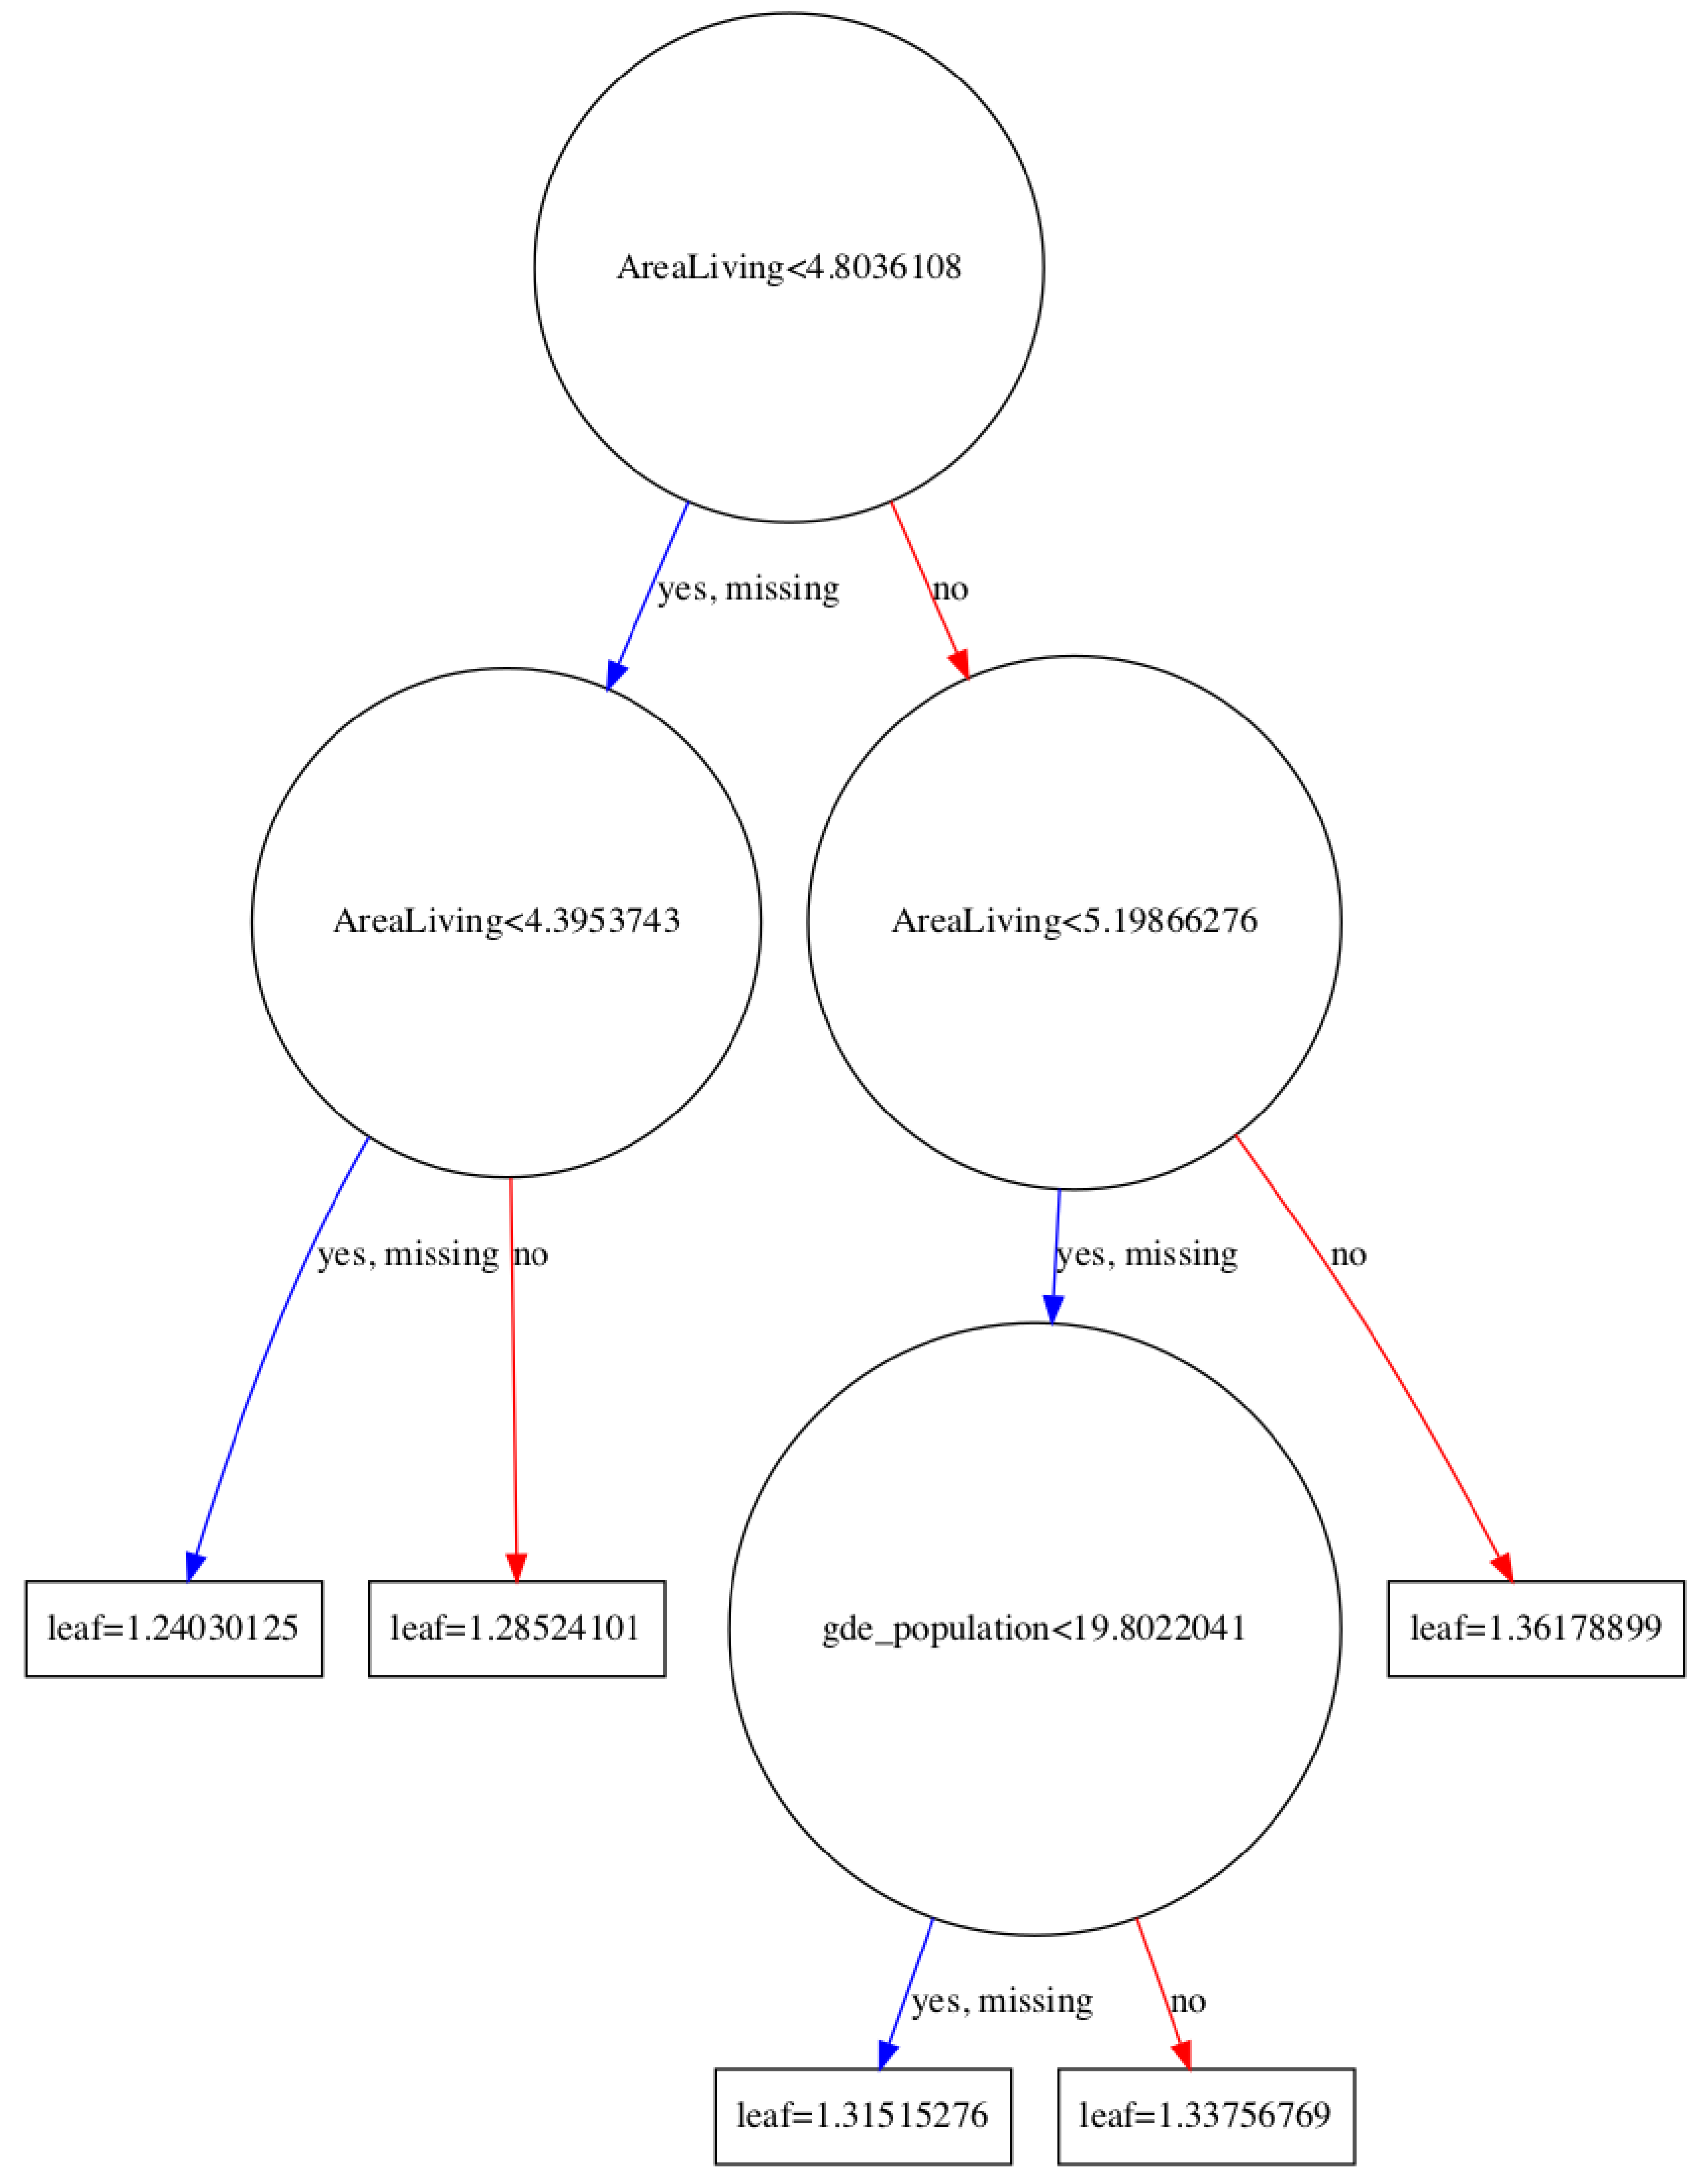

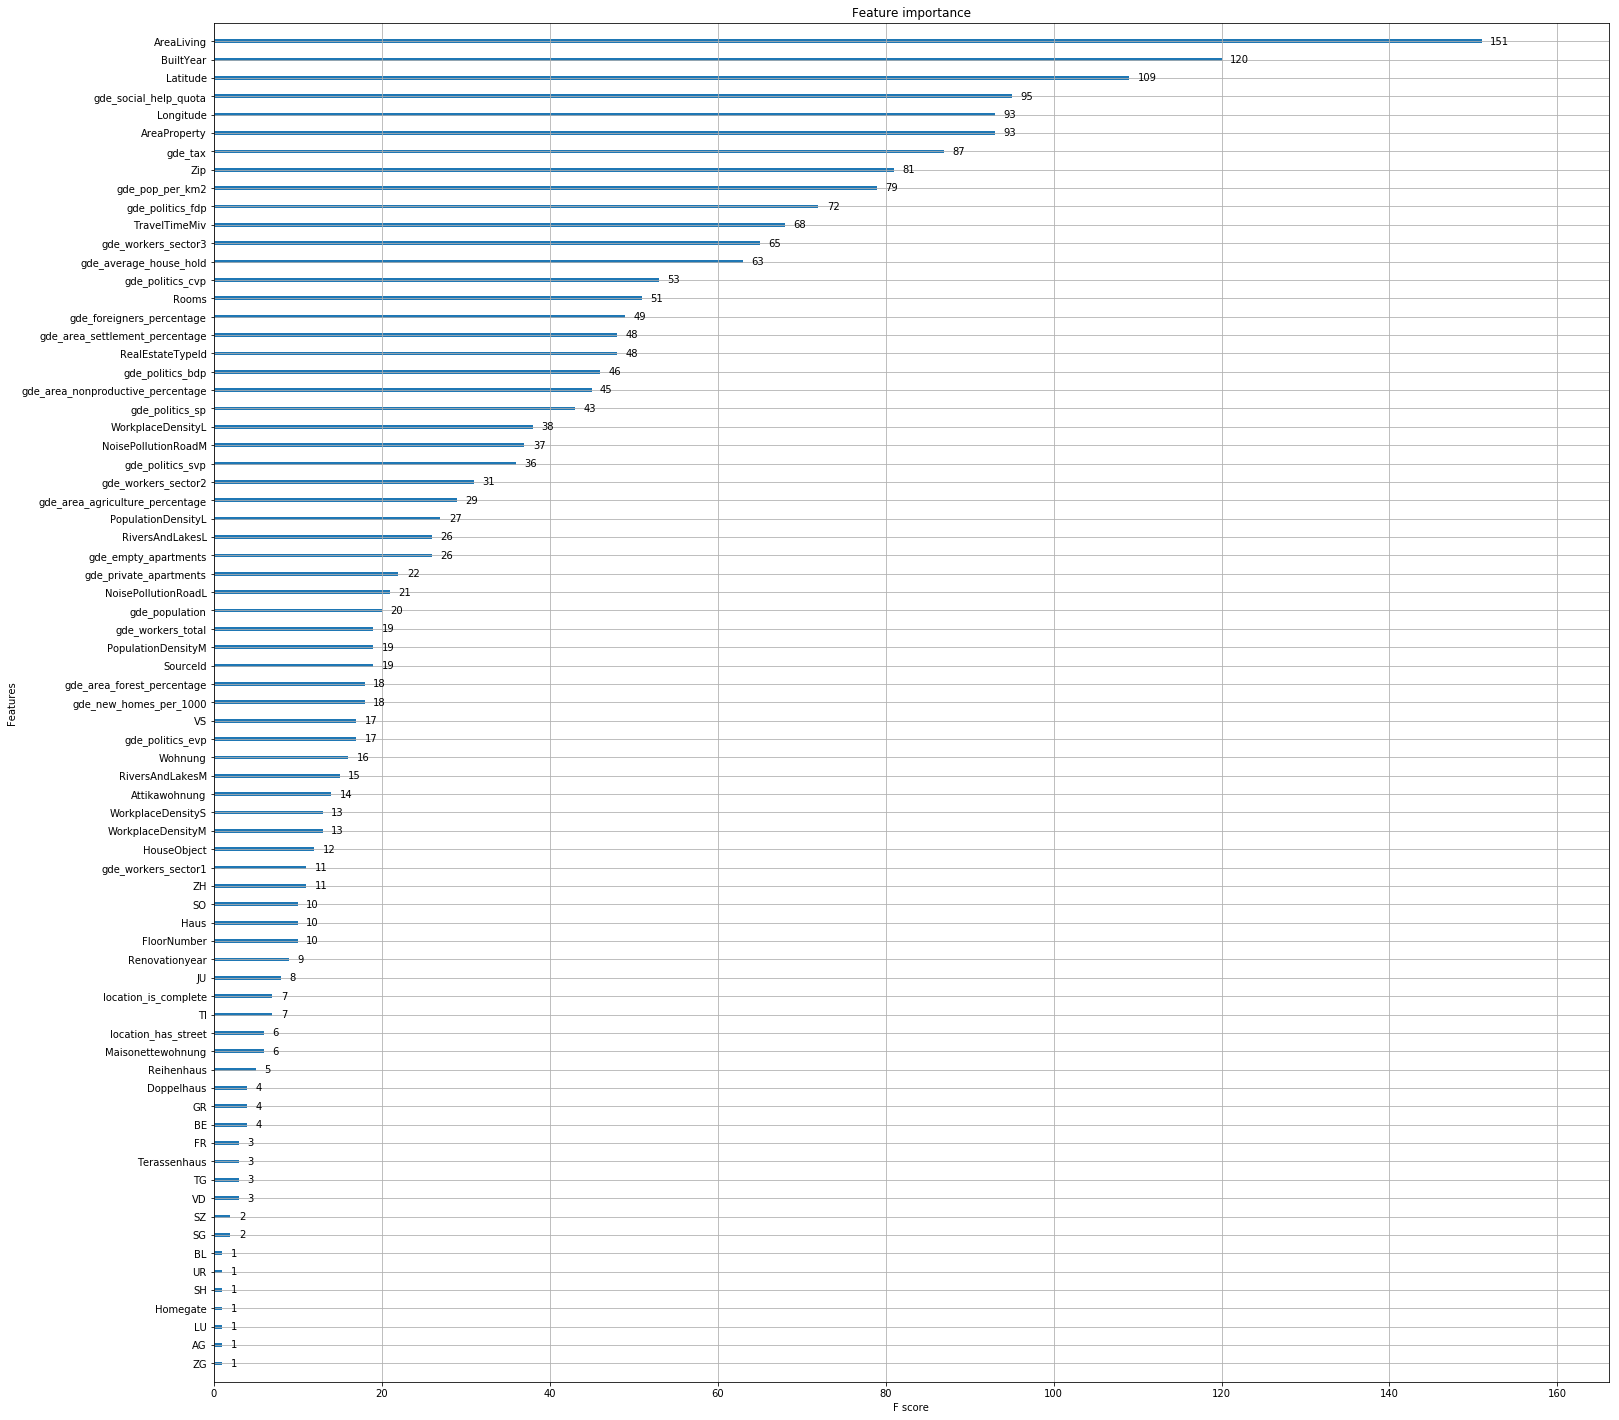

In [6]:
from sklearn.model_selection import train_test_split
from graphviz import Digraph
from sklearn.model_selection import train_test_split
import sklearn

from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.ensemble import RandomForestRegressor
import random 
import pandas as pd
import numpy as np
from scipy import stats
from scipy.special import boxcox1p
from scipy.stats import norm, skew  # for some statistics
import xgboost as xgb
from sklearn.metrics import mean_squared_error

data = pd.read_csv("/Users/lilian/Desktop/project/project data/train.csv",encoding = "ISO-8859-1")
Data = pd.DataFrame(data)




X =Data[['AreaLiving','Rooms','TravelTimeMiv','BuiltYear','NoisePollutionRoadL',
         'NoisePollutionRoadM','PopulationDensityL','PopulationDensityM','RiversAndLakesL',
        'RiversAndLakesM','WorkplaceDensityL','WorkplaceDensityM','WorkplaceDensityS',
        'gde_politics_cvp','gde_politics_evp','gde_politics_sp','gde_politics_fdp',
         'gde_politics_svp','gde_area_agriculture_percentage','gde_area_forest_percentage','gde_area_nonproductive_percentage',
         'gde_area_settlement_percentage','gde_average_house_hold',
         'gde_empty_apartments','gde_foreigners_percentage','gde_new_homes_per_1000','gde_pop_per_km2',
        'gde_population','gde_private_apartments','gde_social_help_quota','gde_tax','gde_workers_sector1',
         'gde_workers_sector2','gde_workers_sector3','gde_workers_total','Latitude','Longitude',
     'AreaProperty','gde_politics_bdp','Renovationyear']]#,'AreaProperty']]#'Name','GroupNameDe''AreaProperty'
#'location_has_street','location_is_complete',

Xc = Data[['Name','GroupNameDe','StateShort']]
Xc1= Data[['SourceId','RealEstateTypeId','HouseObject','Zip','FloorNumber','location_is_complete',
        'location_has_street']]
Y = Data['PurchasePrice']
Y = np.log1p(Y)

X['AreaProperty']=X['AreaProperty'].fillna(0)
X['AreaLiving'] = np.log1p(X['AreaLiving'])
X['Rooms'] = np.log1p(X['Rooms'])
X['AreaProperty'] = np.log1p(X['AreaProperty'])
#X['gde_tax'] = np.log1p(X['gde_tax'])
#X['gde_pop_per_km2']=np.log1p(X['gde_pop_per_km2'])
#X['gde_area_settlement_percentage']=np.log1p(X['gde_area_settlement_percentage'])



X= X.drop([38037, 38038])
Xc = Xc.drop([38037, 38038])
Xc1 = Xc1.drop([38037, 38038])
Y =Y.drop([38037, 38038])

X['gde_politics_cvp']=X['gde_politics_cvp'].fillna(0)
X['gde_politics_evp']=X['gde_politics_evp'].fillna(0)
X['gde_politics_fdp']=X['gde_politics_fdp'].fillna(0)
X['gde_politics_sp']=X['gde_politics_sp'].fillna(0)
X['gde_politics_svp']=X['gde_politics_svp'].fillna(0)
X['gde_politics_bdp']=X['gde_politics_bdp'].fillna(0)
X['Renovationyear']=X['Renovationyear'].fillna(0)

Xc1['FloorNumber']=Xc1['FloorNumber'].fillna(-1)

aera = [0 if values == 0 else np.log1p(values) for values in X.AreaProperty]
X['AreaProperty'] = aera


numeric_feats =['gde_workers_sector3','gde_workers_total','gde_private_apartments',
'gde_population','gde_workers_sector2','gde_new_homes_per_1000','RiversAndLakesM','gde_pop_per_km2','gde_politics_bdp',#',
'RiversAndLakesL','WorkplaceDensityL','gde_area_nonproductive_percentage','WorkplaceDensityM',
'WorkplaceDensityS','gde_empty_apartments','gde_workers_sector1','gde_politics_cvp','gde_politics_evp',
'gde_social_help_quota', 'TravelTimeMiv', 'PopulationDensityM','NoisePollutionRoadL',
'gde_foreigners_percentage','gde_politics_svp','gde_area_forest_percentage','gde_average_house_hold',
                'NoisePollutionRoadM','BuiltYear']

print(len(numeric_feats))


skewed_feats = X[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness

skewed_feats = skewed_feats[abs(skewed_feats) > 0.65]

skewed_feats = skewed_feats.index


print(len(skewed_feats))

print('4',skewed_feats)

X[skewed_feats] = boxcox1p(X[skewed_feats], 0.15)

X= pd.get_dummies(X)

X = X.fillna(X.mean())

print(X.columns)


one_hot = pd.get_dummies(Xc.Name)
Xc = Xc.drop('Name',axis = 1)
Xc = Xc.join(one_hot)
#convert GroupNameDe to numerical value


one_hot = pd.get_dummies(Xc.GroupNameDe)
Xc = Xc.drop('GroupNameDe',axis=1)
Xc = Xc.join(one_hot)



one_hot = pd.get_dummies(Xc.StateShort)
Xc = Xc.drop('StateShort',axis = 1)
Xc = Xc.join(one_hot)

Xc = Xc.drop(['ComHistory','Immoclick'],axis=1)
print(Xc[Xc.isnull().values==True])

print('catogorical', len(Xc.columns))


X_new = X.join(Xc)
X_new = X_new.join(Xc1)
Names = X_new.columns
print(X_new[X_new.isnull().values==True])

data_dmatrix = xgb.DMatrix(data=X_new,label=Y)
x_train,x_test,y_train,y_test = train_test_split(X_new,Y, test_size =0.10,random_state=123)
#regr = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, 
                    #      learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators =100)

regr= xgb.XGBRegressor(learning_rate=0.05, n_estimators=100,
                             max_depth=5, min_child_weight=1.5,
                             subsample=0.6, colsample_bytree=0.4, gamma=0, reg_lambda=0.45,reg_alpha=0.75, n_jobs=-1)

# Fit the regressor to the training set with fit()

regr.fit(x_train,y_train)
print(len(x_train.columns))
print(len(x_test.columns))
preds = regr.predict(x_test)

# Compute the rmse from sklearns metrics module imported earlier
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

#-------k-fold Cross Validation using XGBoost-------
# XGBoost supports the k-fold cross validation with the cv() method
# nfolds is number of cross-validation sets to be build
# More parameters in XGBoost API reference: https://xgboost.readthedocs.io/en/latest/python/python_api.html

#Create Hyper Parameter dictionary params and exclude n_estimators and include num_boost_rounds
params = {"objective":"reg:linear",'colsample_bytree': 0.3, 'learning_rate': 0.1,'max_depth': 5, 'alpha': 10}

# nfold is 3, so three round cross validation set using XGBoost cv() 
# cv_results include the train and test RMSE metrics for each round
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3, num_boost_round=100, early_stopping_rounds=100, metrics="rmse", as_pandas=True, seed=123)
cv_results.head()


# Print Final boosting round metrics
# The final result may depend upon the technique used, so you may want to try different
# e.g. grid search, random search Bayesian optimization
print((cv_results["test-rmse-mean"]).tail(1))

# Train the XGBoost 
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=100)


xgb.plot_tree(xg_reg, num_trees=0)
fig = plt.gcf()
fig.set_size_inches(150, 100)
#plt.rcParams['figure.figsize'] = [50,10]
plt.savefig(r"xfi1.png")
plt.show()

# Alternative is to plot importance of each feature with features ordered as many time as appear
# The plot allows thus to select features for the model
xgb.plot_importance(xg_reg)
#fig = plt.gcf()
#fig.set_size_inches(150, 100)
plt.rcParams['figure.figsize'] =[25,25]
plt.savefig(r"xfi2.png")
plt.show()

In [85]:
from graphviz import Digraph

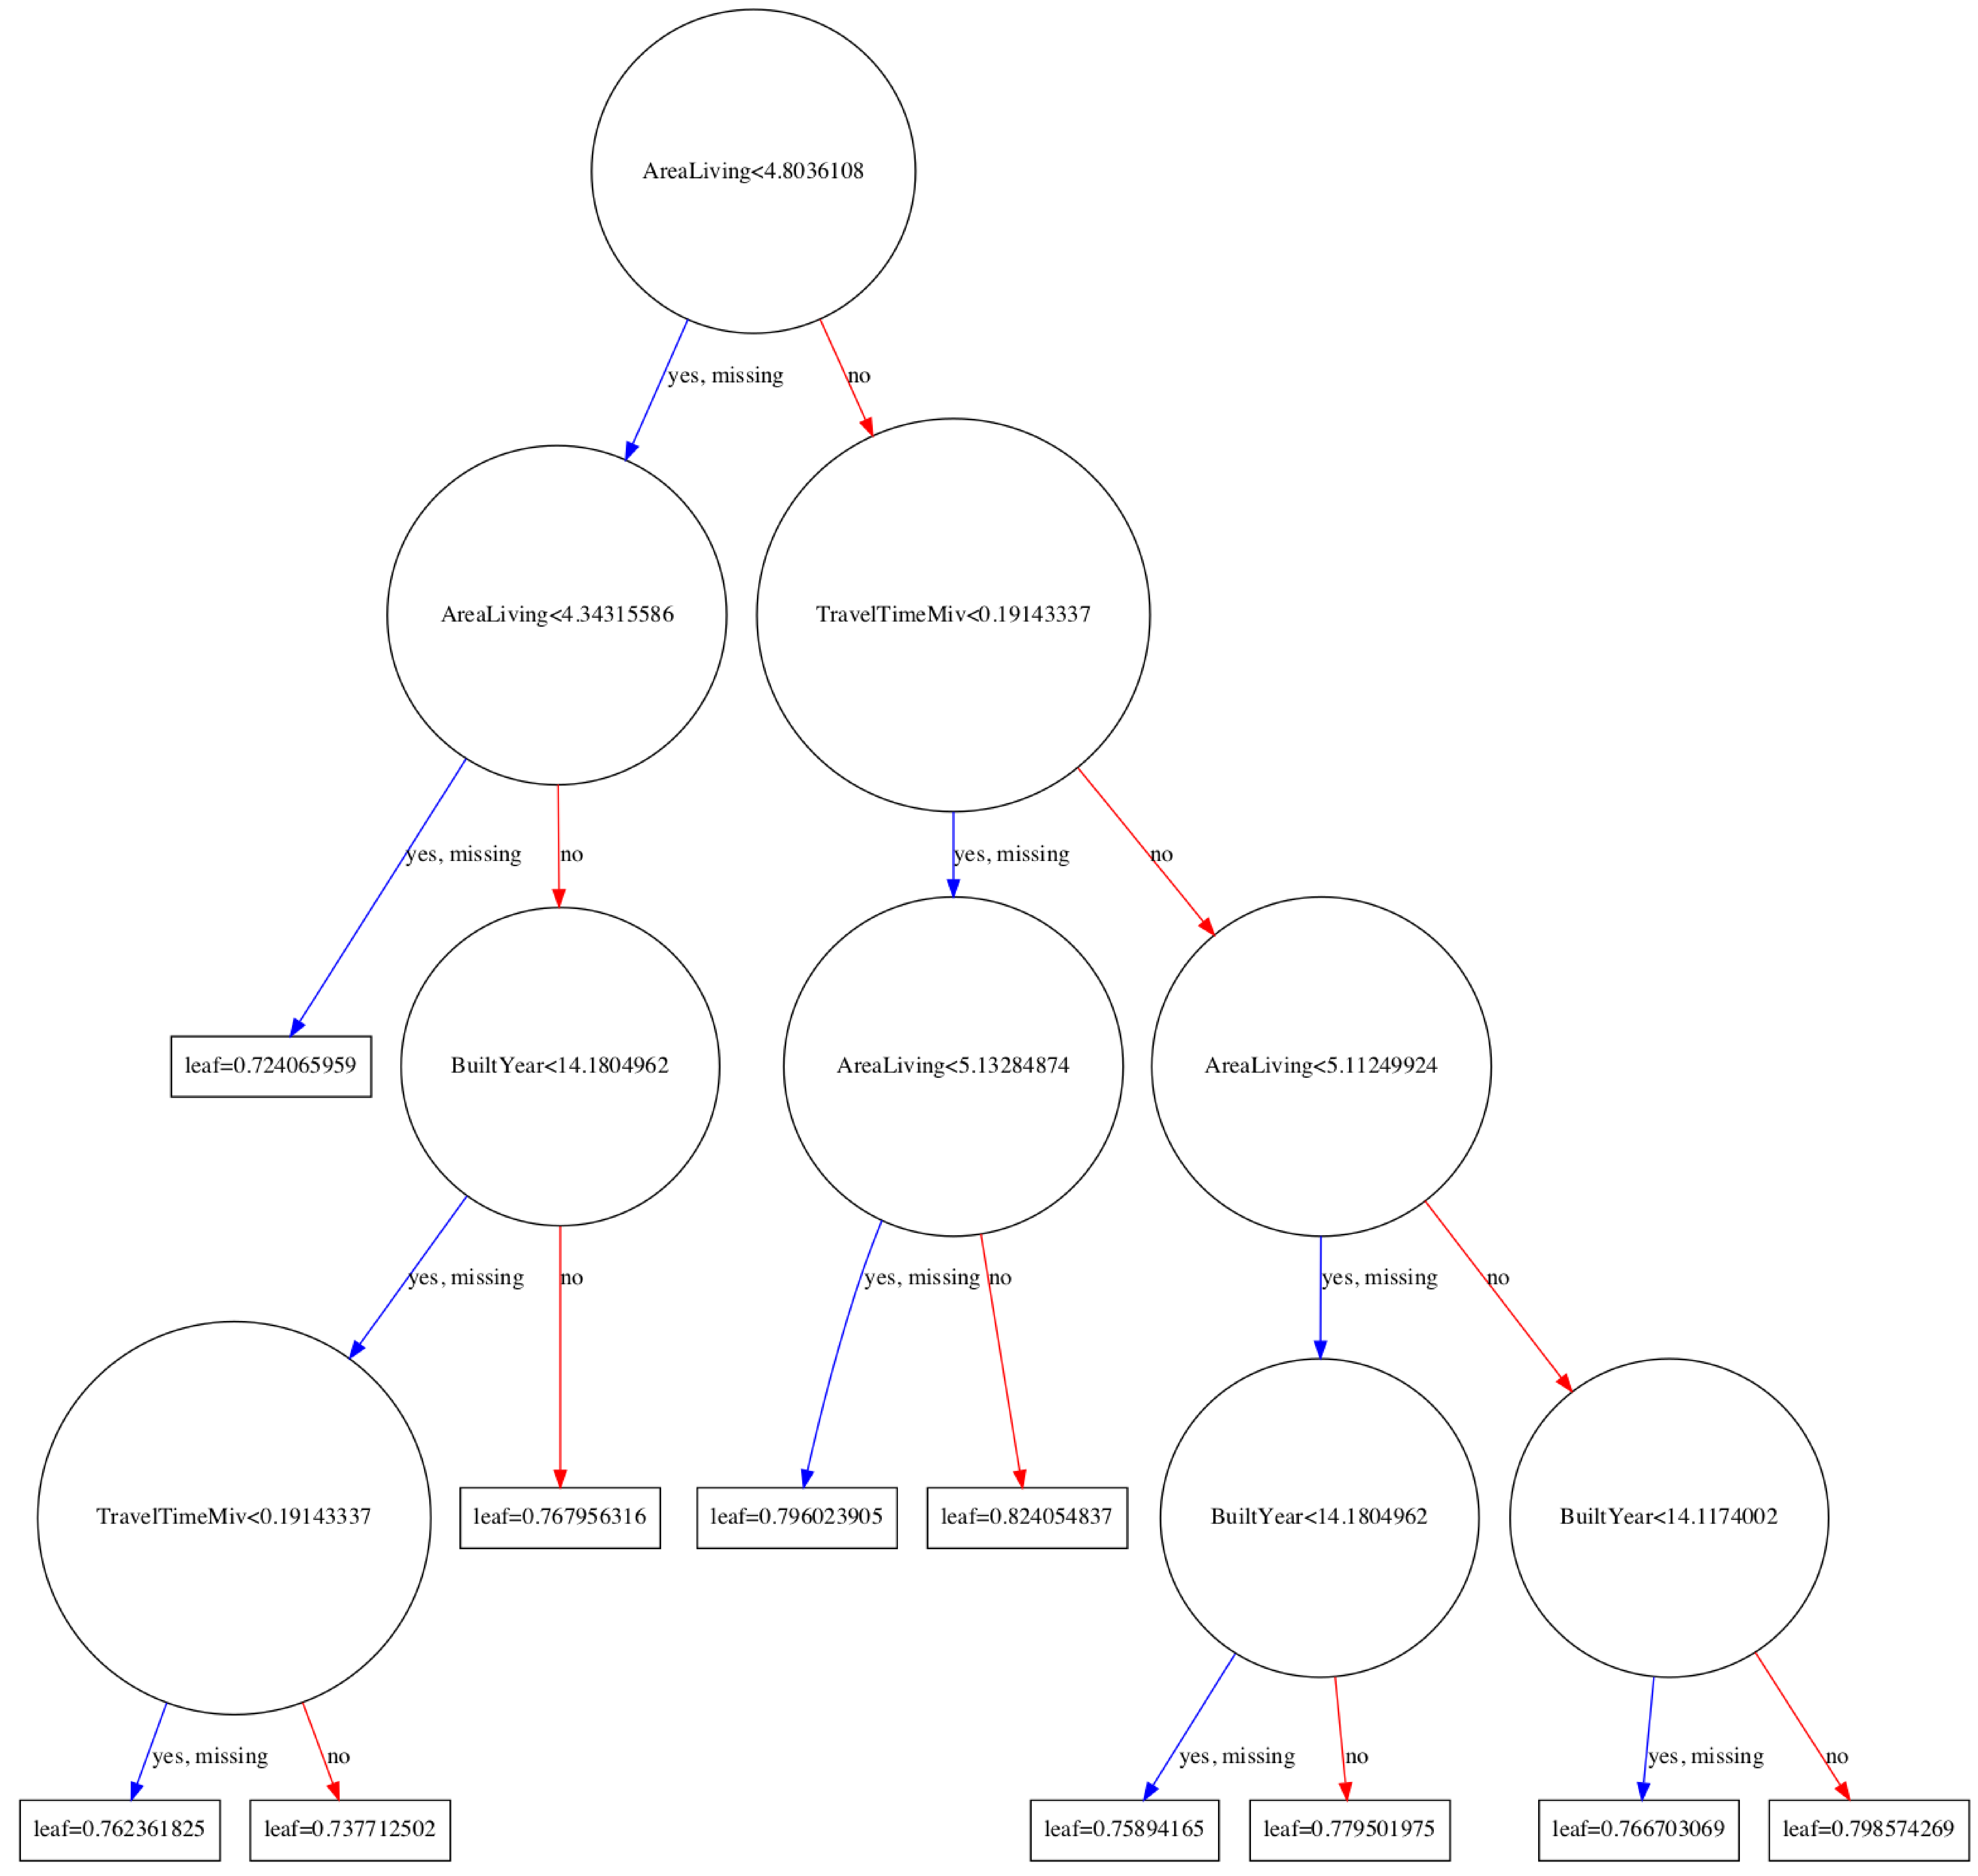

In [7]:
xgb.plot_tree(xg_reg, num_trees=5)
fig = plt.gcf()
fig.set_size_inches(150, 100)
#plt.rcParams['figure.figsize'] =
#[50,10]
plt.savefig(r"xfi3.png")
plt.show()

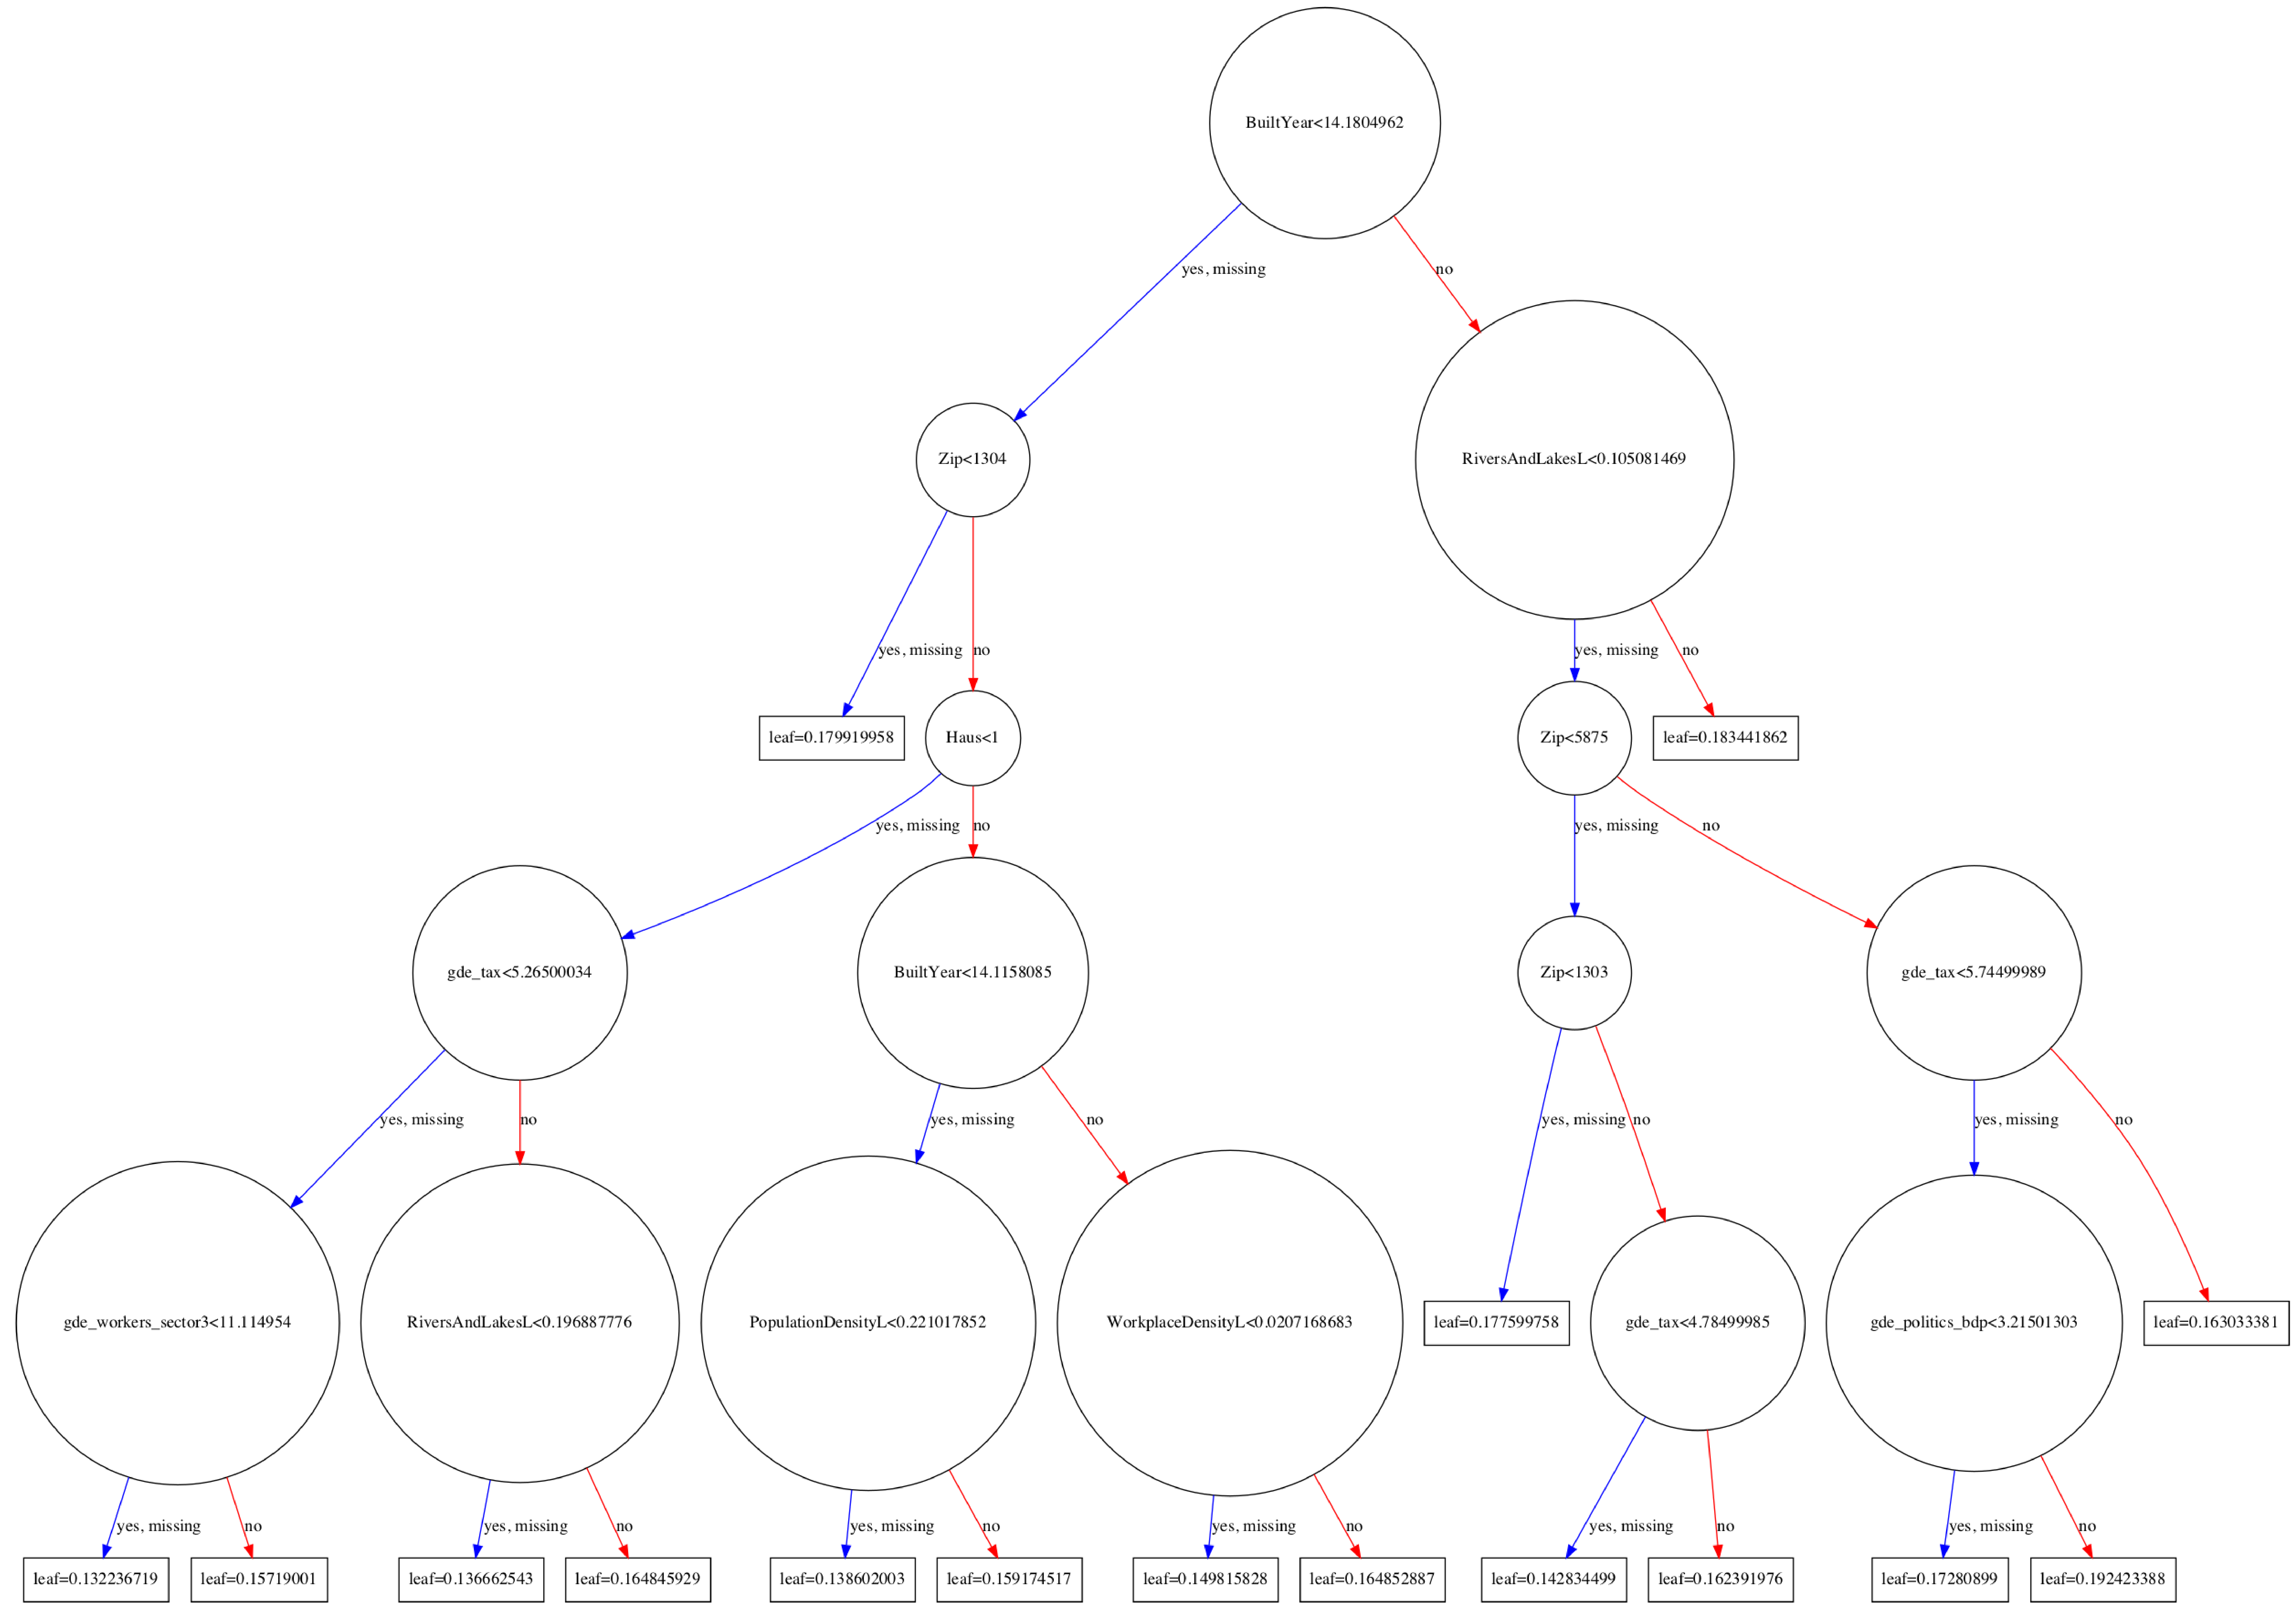

In [8]:
xgb.plot_tree(xg_reg, num_trees=20)
fig = plt.gcf()
fig.set_size_inches(150, 100)
#plt.rcParams['figure.figsize'] = [50,10]
plt.savefig(r"xfi4.png")
plt.show()

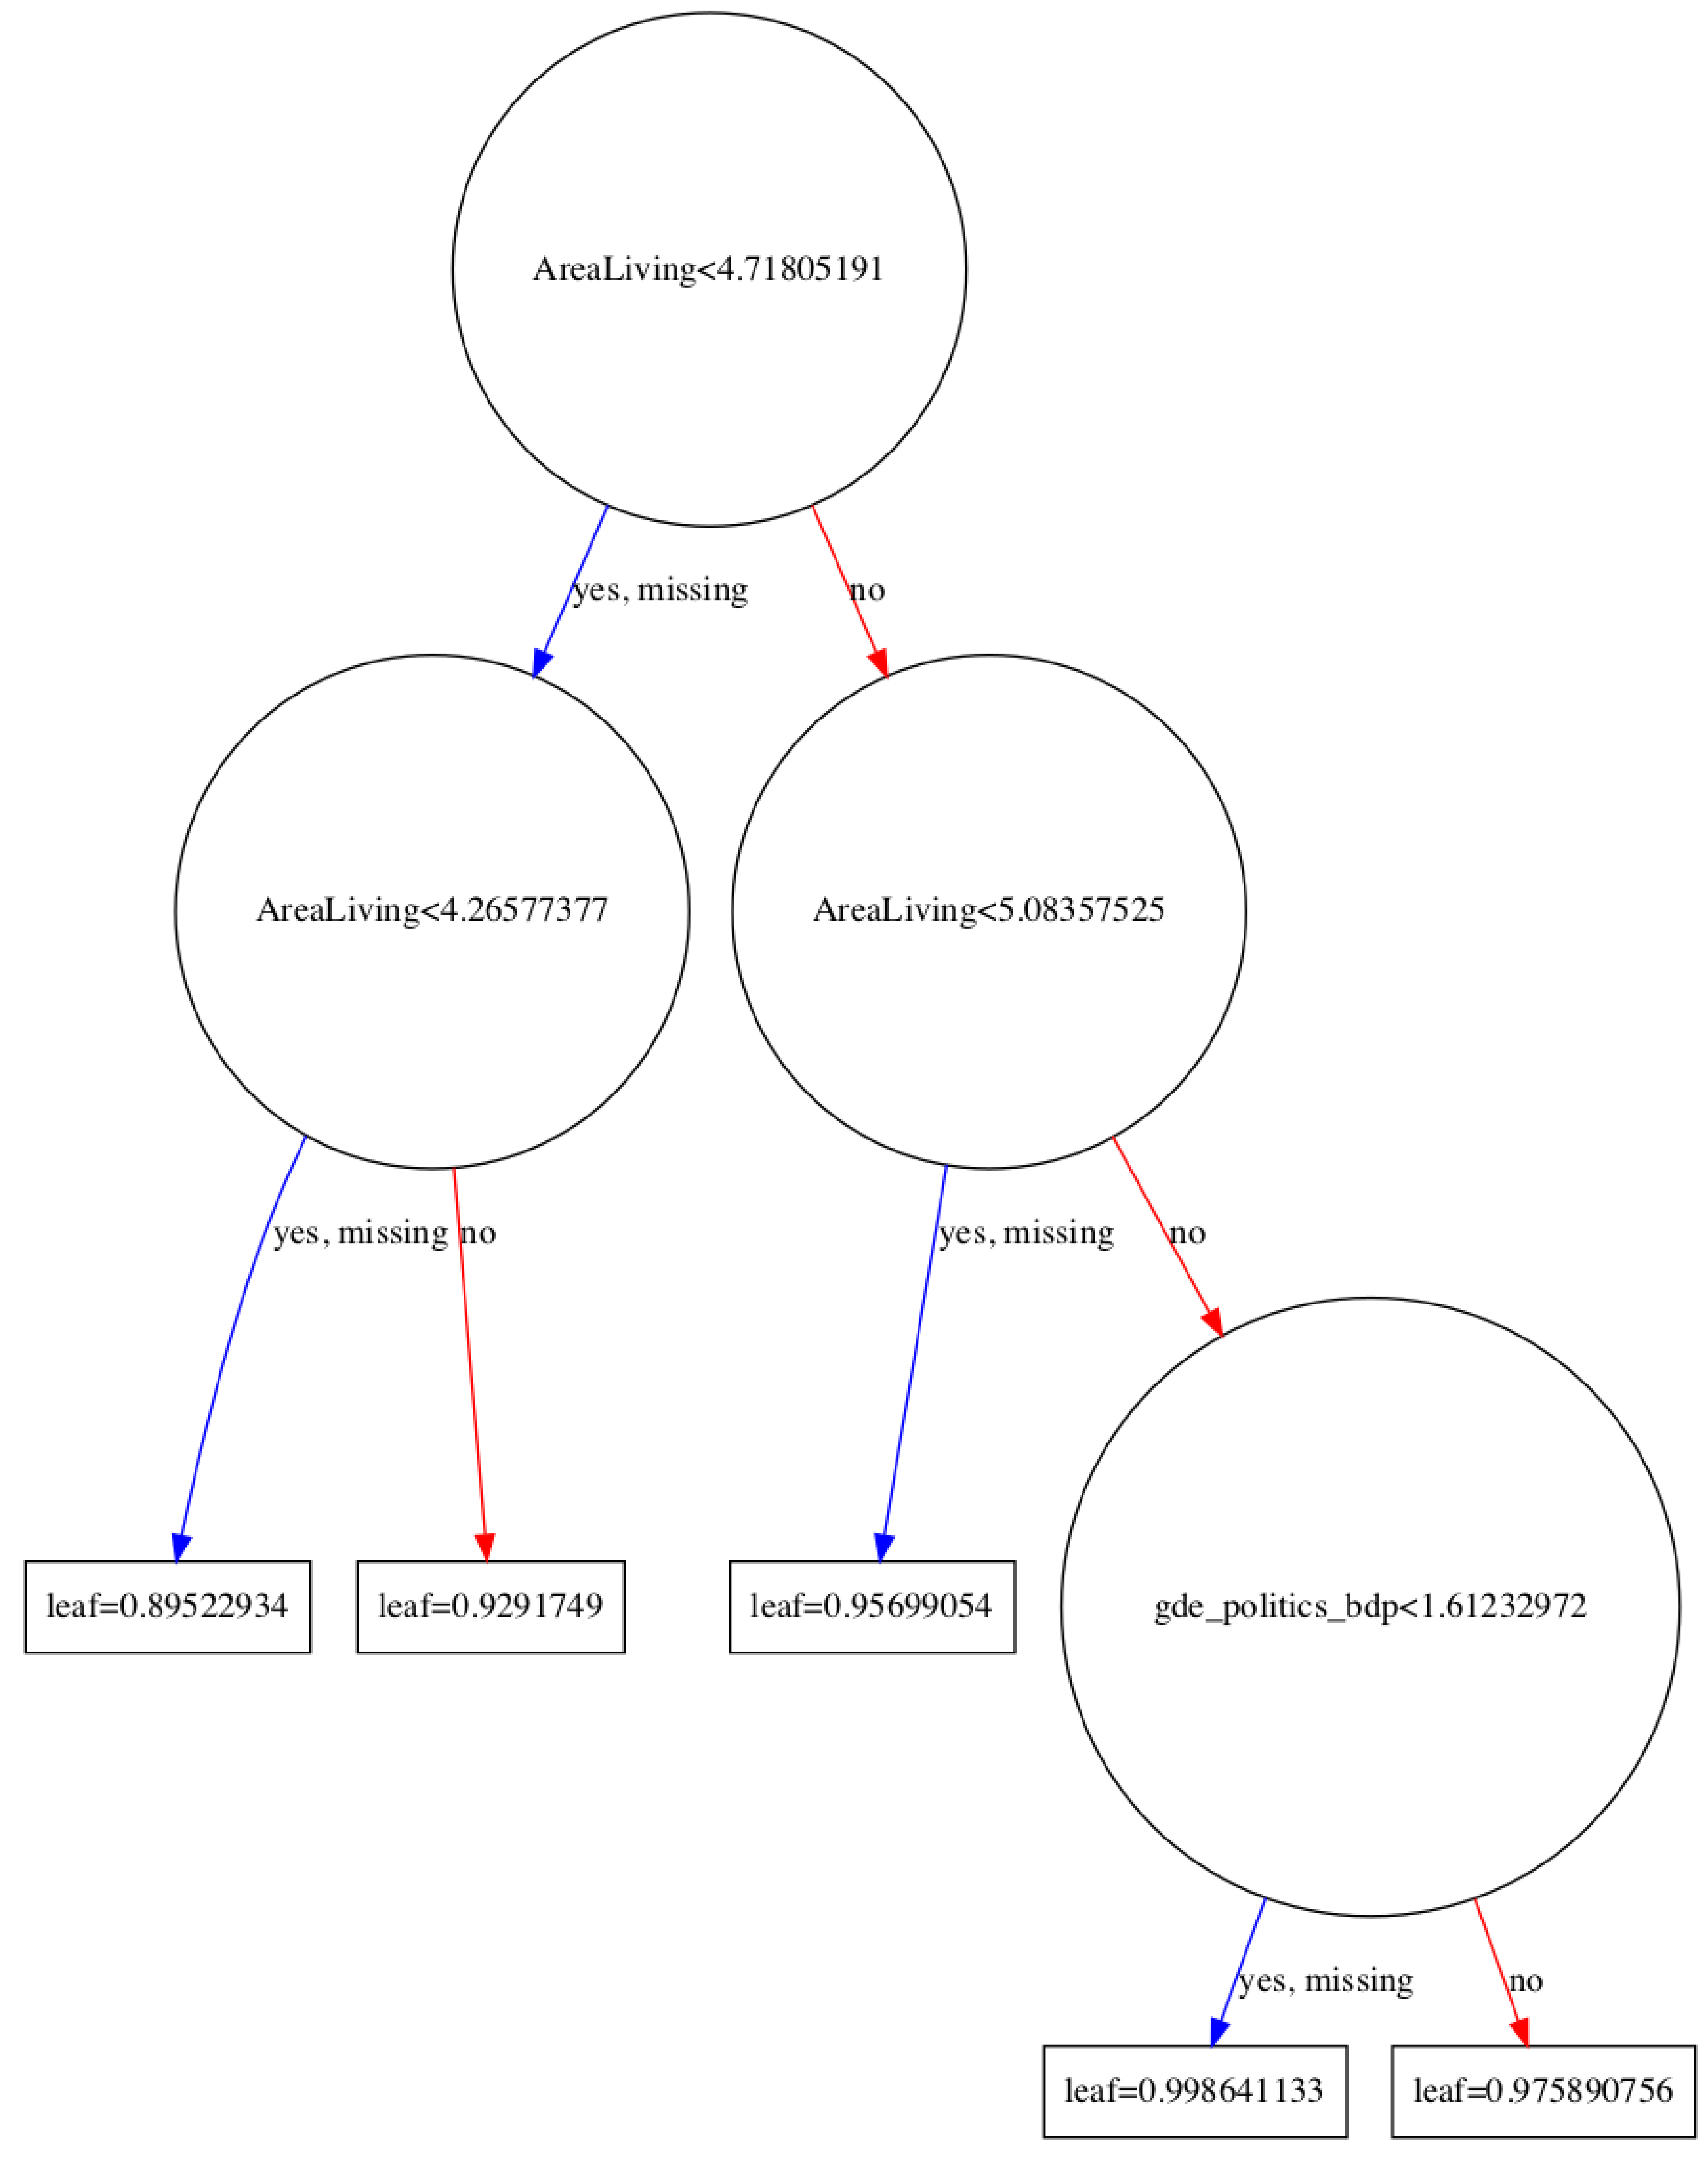

In [112]:
xgb.plot_tree(xg_reg, num_trees=3)
fig = plt.gcf()
fig.set_size_inches(150, 100)
#plt.rcParams['figure.figsize'] = [50,10]
plt.savefig(r"xfi4.png")
plt.show()

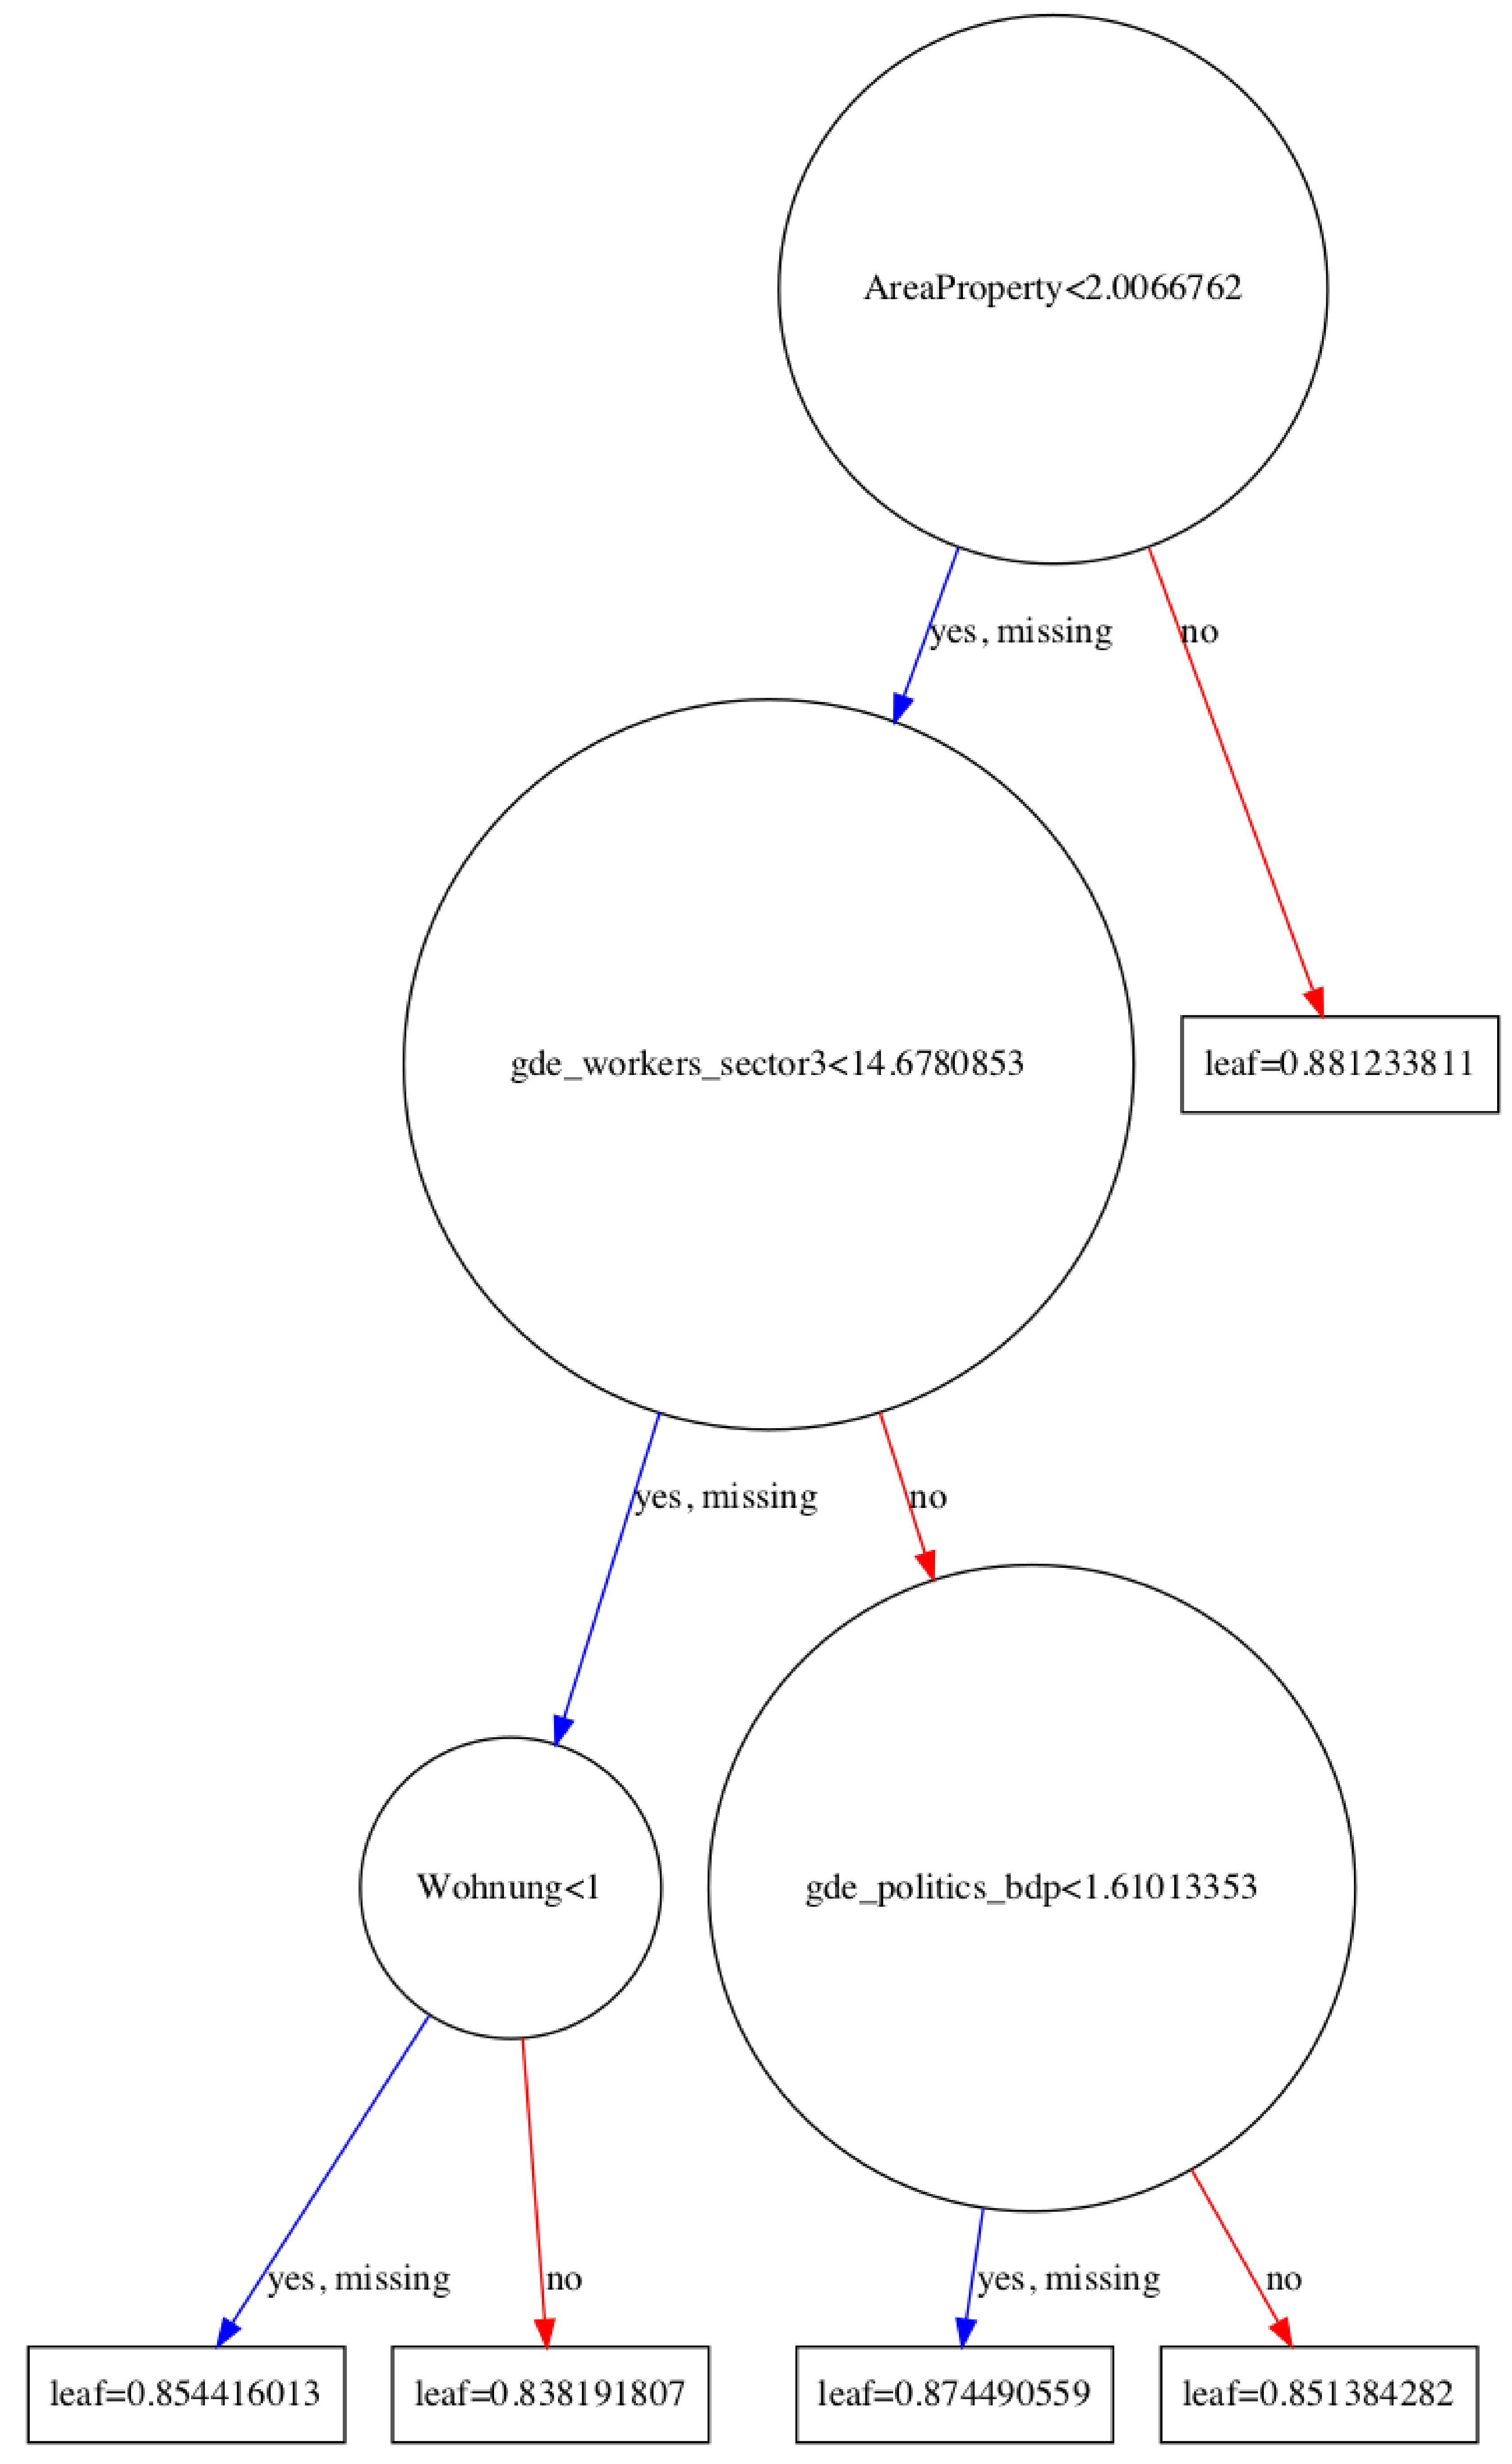

In [113]:
xgb.plot_tree(xg_reg, num_trees=4)
fig = plt.gcf()
fig.set_size_inches(150, 100)
#plt.rcParams['figure.figsize'] = [50,10]
plt.savefig(r"xfi6.png")
plt.show()

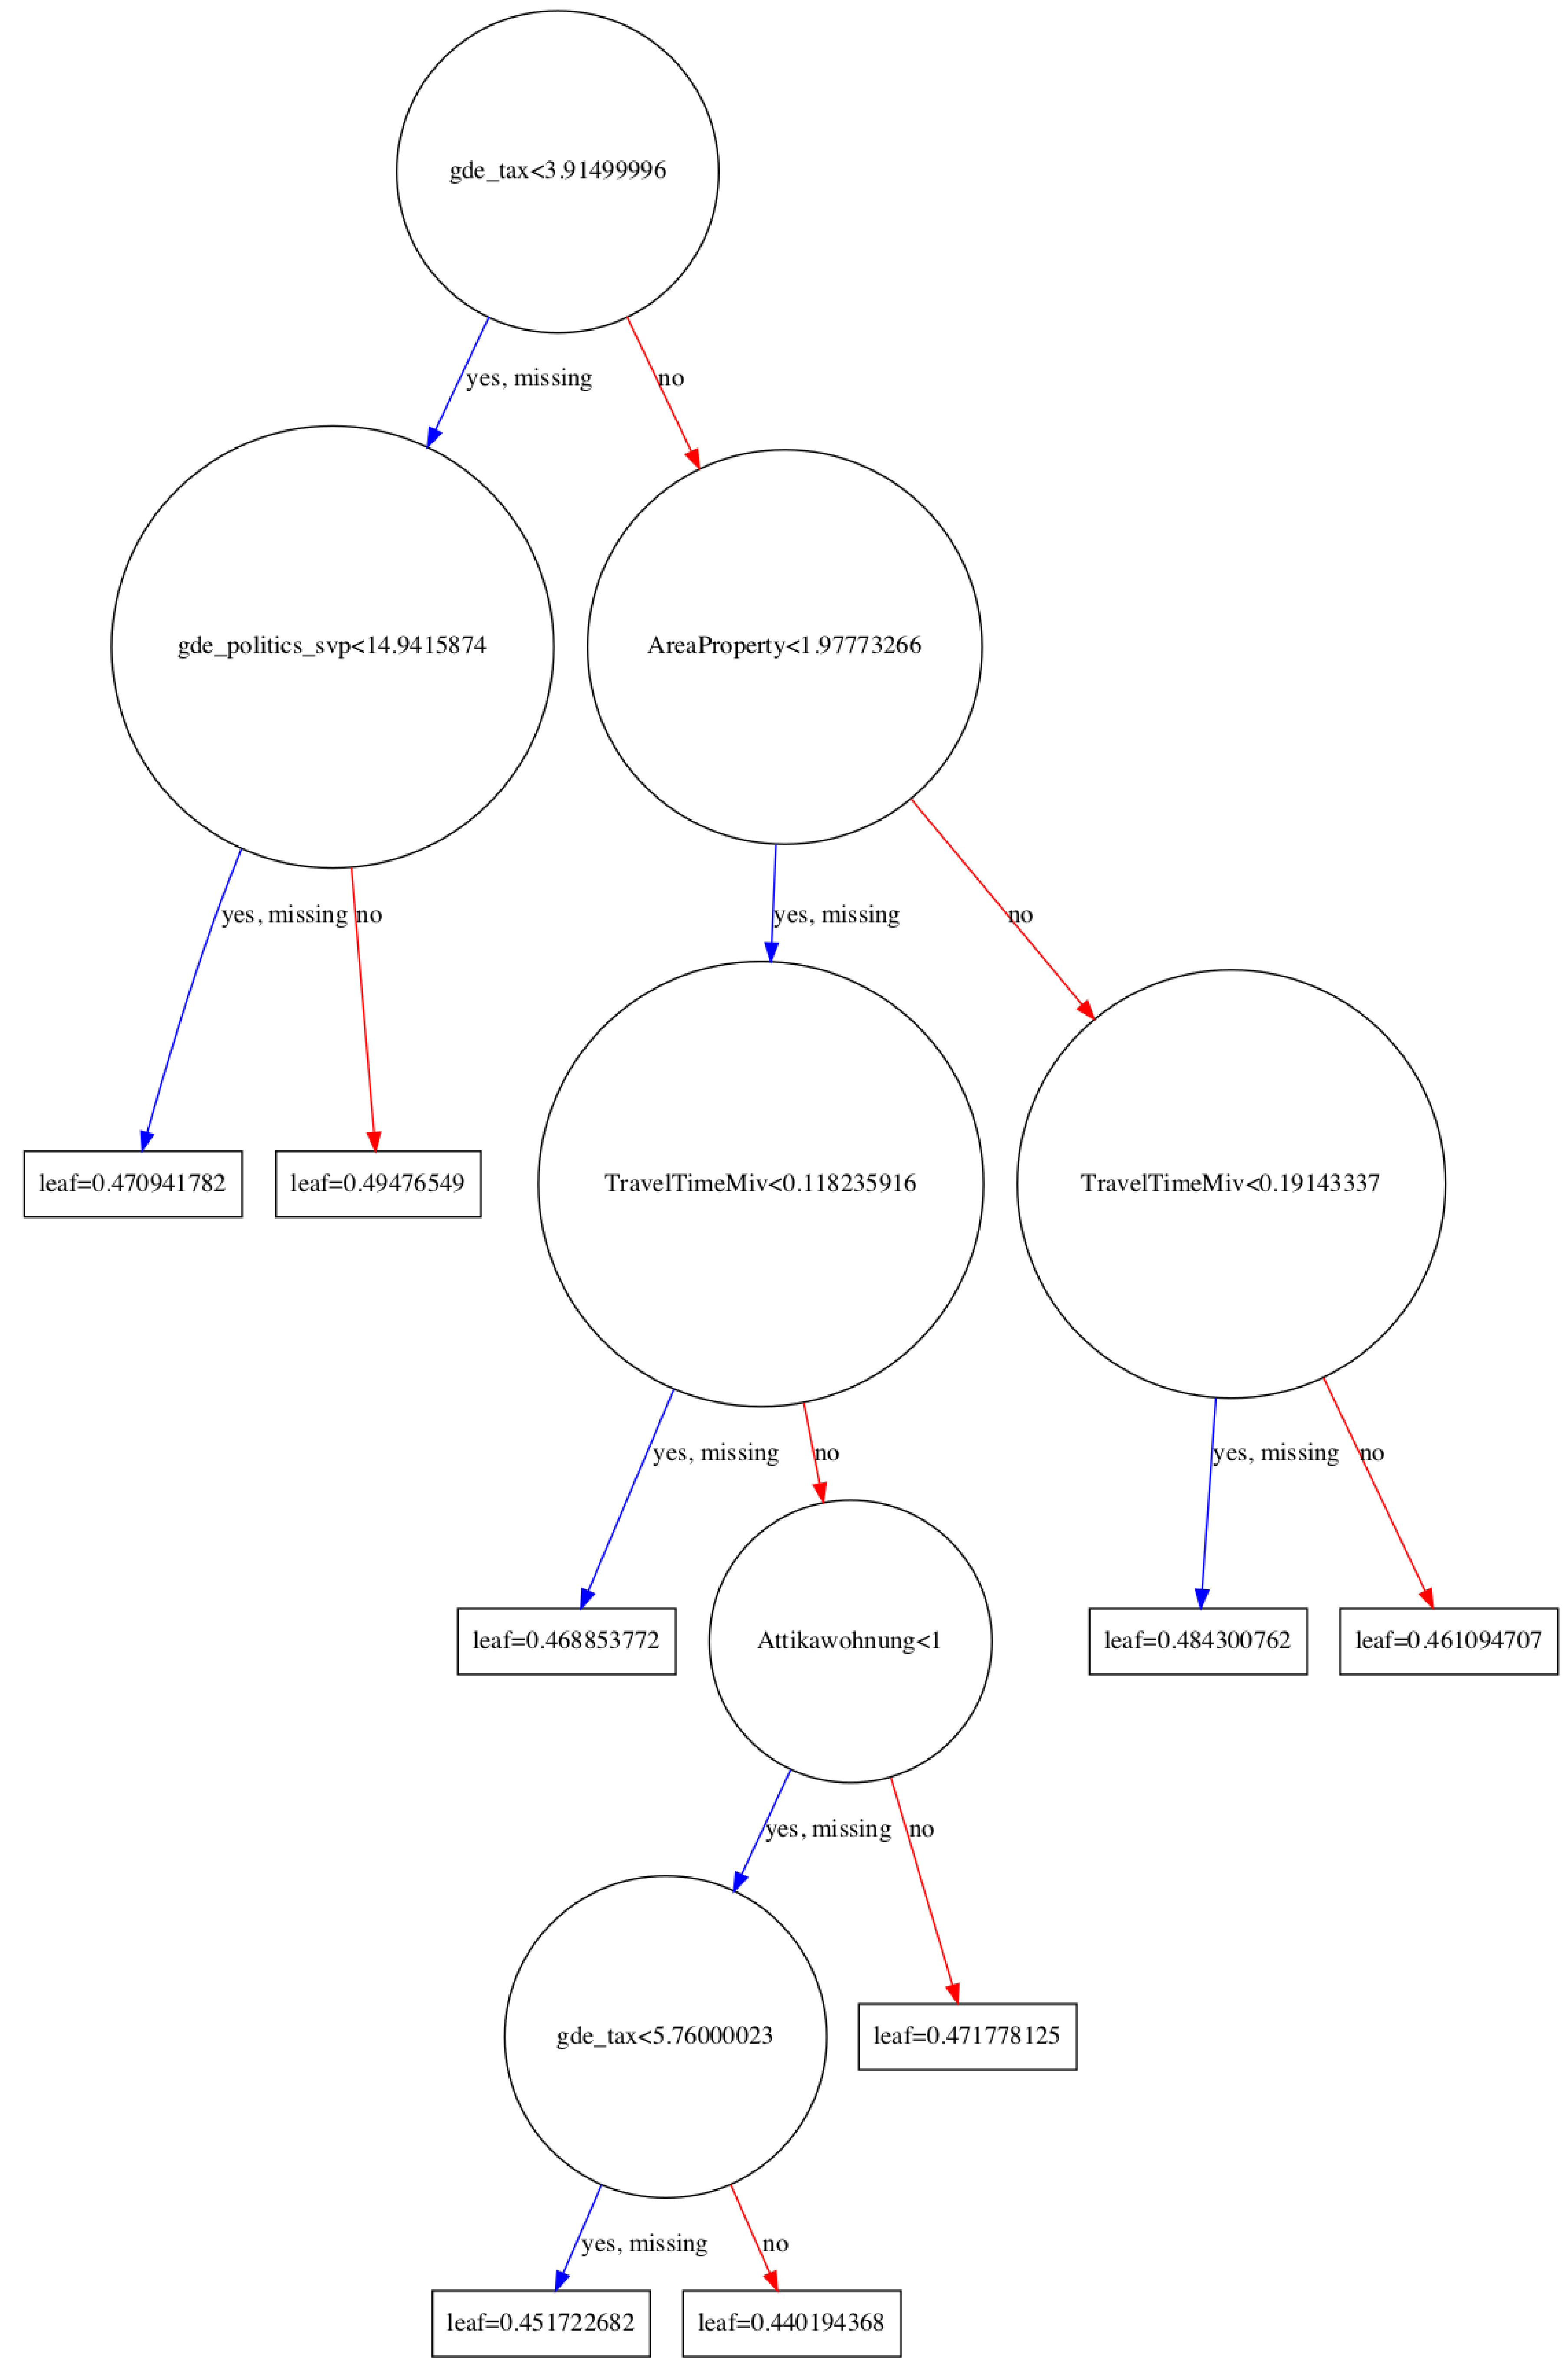

In [114]:
xgb.plot_tree(xg_reg, num_trees=10)
fig = plt.gcf()
fig.set_size_inches(150, 100)
#plt.rcParams['figure.figsize'] = [50,10]
plt.savefig(r"xfi6.png")
plt.show()

# Check the skewness and missing values¶

In [18]:
#first, import the library from sklearn
from sklearn.model_selection import train_test_split
import sklearn

from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.ensemble import RandomForestRegressor
import random 
import pandas as pd
import numpy as np
from scipy.stats import norm, skew

data = pd.read_csv("/Users/lilian/Desktop/project/project data/train.csv",encoding = "ISO-8859-1")
Data = pd.DataFrame(data)

X =Data[['AreaLiving','Rooms','TravelTimeMiv','BuiltYear','NoisePollutionRoadL',
         'NoisePollutionRoadM','PopulationDensityL','PopulationDensityM','RealEstateTypeId','RiversAndLakesL',
        'RiversAndLakesM','SourceId','WorkplaceDensityL','WorkplaceDensityM','WorkplaceDensityS',
        'gde_politics_cvp','gde_politics_evp','gde_politics_fdp','gde_politics_sp','gde_politics_bdp',
         'gde_politics_svp','gde_area_agriculture_percentage','gde_area_forest_percentage','gde_area_nonproductive_percentage',
         'gde_area_settlement_percentage','gde_average_house_hold',
         'gde_empty_apartments','gde_foreigners_percentage','gde_new_homes_per_1000','gde_pop_per_km2',
        'gde_population','gde_private_apartments','gde_social_help_quota','gde_tax','gde_workers_sector1',
         'gde_workers_sector2','gde_workers_sector3','gde_workers_total','Latitude','Longitude',
     'Renovationyear','AreaProperty','HouseObject','Zip']]#,'AreaProperty']]#'Name','GroupNameDe''AreaProperty'
skewed_feats = X.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(20)
#modifty the data 
print(Data['gde_area_settlement_percentage'][Data['gde_area_settlement_percentage'].isnull().values==True])
Y = Data['PurchasePrice']
Y = np.log1p(Y)
X['AreaLiving'] = np.log1p(X['AreaLiving'])
Names = X.columns
print(len(Names))
#Convert Name to numerical value


X= X.drop([38037, 38038])
Y =Y.drop([38037, 38038])
#X['gde_politics_cvp']=X['gde_politics_cvp'].fillna(method='ffill')
#X['gde_politics_evp']=X['gde_politics_evp'].fillna(method='ffill')
#X['gde_politics_fdp']=X['gde_politics_fdp'].fillna(method='ffill')
#X['gde_politics_sp']=X['gde_politics_sp'].fillna(method='ffill')
#X['gde_politics_svp']=X['gde_politics_svp'].fillna(method='ffill')
#X['gde_politics_bdp']=X['gde_politics_bdp'].fillna(method='ffill')
X['gde_politics_cvp']=X['gde_politics_cvp'].fillna(0)
X['gde_politics_evp']=X['gde_politics_evp'].fillna(0)
X['gde_politics_fdp']=X['gde_politics_fdp'].fillna(0)
X['gde_politics_sp']=X['gde_politics_sp'].fillna(0)
X['gde_politics_svp']=X['gde_politics_svp'].fillna(0)
X['gde_politics_bdp']=X['gde_politics_bdp'].fillna(0)



#X['BuiltYear']=2019- X['BuiltYear']
conv_year = [0 if values == 'nan' else 1 for values in X.Renovationyear]
X['Renovationyear'] = conv_year
#conv_rooms = [1 if values <=10 else 0 for values in X.Rooms]
#X.loc[:,1]= conv_rooms
#conv_pro = [1 if values >20 else 0 for values in X.AreaProperty]
#X.loc[:,2]= conv_pro
Names = X.columns
print(Names)
#X=Data[['AreaLiving', 'Rooms', 'Longitude', 'gde_tax', 'AreaProperty','RealEstateTypeId']]
#Y = Data[['PurchasePrice']]
#X= X.drop([38037, 38038])
#Y =Y.drop([38037, 38038])
print(X.shape)
#print(X.head)
#pd.get_dummies(X.HouseObject.head(15), drop_first=True)
#conv_dates=[1 if values ==2014 else 0 for values in data.date]
#data['date']=conv_dates
#X = X.drop(['ComHistory','Immoclick'],axis=1)#'Terassenhaus','Newhome','Zimmer',
          #'Urbanhome', 'Reihenhaus','NabHome','Mehrfamilienhaus','Maisonettewohnung',
           #'Loftwohnung','Immowelt','Immostreet','Immoscout','ICasa','Doppelhaus','Anderes Haus']
#Names = X.columns
#print(Names)
#print(len(Names))
#print(X['BuiltYear'])


38037   NaN
38038   NaN
Name: gde_area_settlement_percentage, dtype: float64
44
Index(['AreaLiving', 'Rooms', 'TravelTimeMiv', 'BuiltYear',
       'NoisePollutionRoadL', 'NoisePollutionRoadM', 'PopulationDensityL',
       'PopulationDensityM', 'RealEstateTypeId', 'RiversAndLakesL',
       'RiversAndLakesM', 'SourceId', 'WorkplaceDensityL', 'WorkplaceDensityM',
       'WorkplaceDensityS', 'gde_politics_cvp', 'gde_politics_evp',
       'gde_politics_fdp', 'gde_politics_sp', 'gde_politics_bdp',
       'gde_politics_svp', 'gde_area_agriculture_percentage',
       'gde_area_forest_percentage', 'gde_area_nonproductive_percentage',
       'gde_area_settlement_percentage', 'gde_average_house_hold',
       'gde_empty_apartments', 'gde_foreigners_percentage',
       'gde_new_homes_per_1000', 'gde_pop_per_km2', 'gde_population',
       'gde_private_apartments', 'gde_social_help_quota', 'gde_tax',
       'gde_workers_sector1', 'gde_workers_sector2', 'gde_workers_sector3',
       'gde_workers_total

/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [19]:
skewness.head(20)

,Skew
gde_workers_sector3,6.552877
gde_workers_total,6.370410
RealEstateTypeId,6.261766
gde_private_apartments,5.886354
gde_population,5.860923
Rooms,5.363506
gde_workers_sector2,5.020113
gde_new_homes_per_1000,5.014164
RiversAndLakesM,4.858933
gde_pop_per_km2,4.368831


In [3]:
aa = Data.isnull().sum()
print(aa[aa>0].sort_values(ascending=False))



Renovationyear                       138326
gde_politics_pda                      91628
FloorNumber                           87695
StreetAndNr                           46435
gde_politics_bdp                      32803
gde_politics_rights                   30535
gde_politics_evp                      29595
gde_politics_glp                      18442
gde_politics_gps                      11113
gde_politics_cvp                       5058
gde_politics_fdp                       2920
gde_politics_sp                        2046
gde_politics_svp                        893
gde_population                            2
gde_average_house_hold                    2
gde_workers_sector2                       2
gde_workers_sector1                       2
TravelTimeMiv                             2
gde_area_agriculture_percentage           2
gde_area_forest_percentage                2
gde_area_nonproductive_percentage         2
gde_area_settlement_percentage            2
gde_new_homes_per_1000          

In [10]:
X =Data[['AreaLiving','Rooms','TravelTimeMiv','BuiltYear','NoisePollutionRoadL',
         'NoisePollutionRoadM','PopulationDensityL','PopulationDensityM','RealEstateTypeId','RiversAndLakesL',
        'RiversAndLakesM','SourceId','WorkplaceDensityL','WorkplaceDensityM','WorkplaceDensityS',
        'gde_politics_cvp','gde_politics_evp','gde_politics_sp','gde_politics_fdp',
         'gde_politics_svp','gde_area_agriculture_percentage','gde_area_forest_percentage','gde_area_nonproductive_percentage',
         'gde_area_settlement_percentage','gde_average_house_hold',
         'gde_empty_apartments','gde_foreigners_percentage','gde_new_homes_per_1000','gde_pop_per_km2',
        'gde_population','gde_private_apartments','gde_social_help_quota','gde_tax','gde_workers_sector1',
         'gde_workers_sector2','gde_workers_sector3','gde_workers_total','Latitude','Longitude',
     'AreaProperty','HouseObject','Zip','gde_politics_bdp','gde_politics_pda','Renovationyear']]
X['gde_politics_cvp']=X['gde_politics_cvp'].fillna(0)
X['gde_politics_evp']=X['gde_politics_evp'].fillna(0)
X['gde_politics_fdp']=X['gde_politics_fdp'].fillna(0)
X['gde_politics_sp']=X['gde_politics_sp'].fillna(0)
X['gde_politics_svp']=X['gde_politics_svp'].fillna(0)
X['gde_politics_bdp']=X['gde_politics_bdp'].fillna(0)
X['gde_politics_pda']=X['gde_politics_pda'].fillna(0)
conv_year = [0 if values == 'nan' else 1 for values in X.Renovationyear]
X['Renovationyear'] = conv_year
X['BuiltYear']=2019-X['BuiltYear']


/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [11]:
from scipy.stats import norm, skew
skewed_feats = X.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness

,Skew
gde_politics_pda,9.195823
gde_workers_sector3,6.552877
gde_workers_total,6.370410
RealEstateTypeId,6.261766
gde_private_apartments,5.886354
gde_population,5.860923
Rooms,5.363506
gde_workers_sector2,5.020113
gde_new_homes_per_1000,5.014164
RiversAndLakesM,4.858933


In [25]:
aa = Data.isnull().sum()
print(aa[aa>0].sort_values(ascending=False))

Renovationyear                       138326
gde_politics_pda                      91628
FloorNumber                           87695
StreetAndNr                           46435
gde_politics_bdp                      32803
gde_politics_rights                   30535
gde_politics_evp                      29595
gde_politics_glp                      18442
gde_politics_gps                      11113
gde_politics_cvp                       5058
gde_politics_fdp                       2920
gde_politics_sp                        2046
gde_politics_svp                        893
gde_population                            2
gde_average_house_hold                    2
gde_workers_sector2                       2
gde_workers_sector1                       2
TravelTimeMiv                             2
gde_area_agriculture_percentage           2
gde_area_forest_percentage                2
gde_area_nonproductive_percentage         2
gde_area_settlement_percentage            2
gde_new_homes_per_1000          

In [13]:
import pandas as pd
data_test = pd.read_csv("/Users/lilian/Desktop/project/project data/test.csv")
Data_test = pd.DataFrame(data_test)
X_test =Data_test[['AreaLiving','Rooms','TravelTimeMiv','BuiltYear','NoisePollutionRoadL',
         'NoisePollutionRoadM','PopulationDensityL','PopulationDensityM','RealEstateTypeId','RiversAndLakesL',
       'RiversAndLakesM',  'SourceId','WorkplaceDensityL','WorkplaceDensityM','WorkplaceDensityS',
        'gde_politics_cvp','gde_politics_evp','gde_politics_sp','gde_politics_fdp',
         'gde_politics_svp','gde_area_agriculture_percentage','gde_area_forest_percentage','gde_area_nonproductive_percentage',
         'gde_area_settlement_percentage','gde_average_house_hold',
         'gde_empty_apartments','gde_foreigners_percentage','gde_new_homes_per_1000','gde_pop_per_km2',
        'gde_population','gde_private_apartments','gde_social_help_quota','gde_tax','gde_workers_sector1',
         'gde_workers_sector2','gde_workers_sector3','gde_workers_total','Latitude','Longitude'
        ,'AreaProperty','HouseObject','Zip','gde_politics_bdp','gde_politics_pda','Renovationyear' ]]#,'FloorNumber']]#,'AreaProperty']]#'Name',
#'GroupNameDe','AreaProperty','location_has_street','location_is_complete',
Xc_test=Data_test[['Name','GroupNameDe','StateShort']]
conv_year = [0 if values == 'nan' else 1 for values in X_test.Renovationyear]
X_test['gde_politics_cvp']=X_test['gde_politics_cvp'].fillna(0)
X_test['gde_politics_evp']=X_test['gde_politics_evp'].fillna(0)
X_test['gde_politics_fdp']=X_test['gde_politics_fdp'].fillna(0)
X_test['gde_politics_sp']=X_test['gde_politics_sp'].fillna(0)
X_test['gde_politics_svp']=X_test['gde_politics_svp'].fillna(0)
X_test['gde_politics_bdp']=X_test['gde_politics_bdp'].fillna(0)
X_test['gde_politics_pda']=X_test['gde_politics_pda'].fillna(0)
X_test['AreaProperty']=X_test['AreaProperty'].fillna(0)
X_test['Renovationyear'] = conv_year
X_test['BuiltYear'] = 2019 - X_test["BuiltYear"]

/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/index

In [14]:
aa = Data_test.isnull().sum()
print(aa[aa>0].sort_values(ascending=False))

Renovationyear         23097
AreaProperty           19458
gde_politics_pda       17374
FloorNumber            16722
StreetAndNr            16141
gde_politics_bdp        9981
gde_politics_rights     8483
gde_politics_evp        6926
gde_politics_glp        6112
gde_politics_gps        2272
gde_politics_cvp         800
gde_politics_fdp         489
gde_politics_sp          349
gde_politics_svp         140
dtype: int64


In [15]:
skewed_feats = X_test.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness

,Skew
RealEstateTypeId,8.576218
gde_workers_sector3,7.958720
gde_politics_pda,7.948100
gde_workers_total,7.702628
gde_private_apartments,6.871898
gde_population,6.823676
gde_workers_sector2,6.103499
gde_pop_per_km2,5.078811
gde_new_homes_per_1000,4.879520
RiversAndLakesM,4.097146
